In [1]:
# Basic set up and load dataset

import pandas as pd
import os
import random

random.seed(789)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


PATH_DATA_IN = r'G:\My Drive\MasterThesis\Data\Meli\Clean\CABA\Alquiler'
PATH_DATA_OUT = r'G:\My Drive\MasterThesis\Output'
# PATH_DATA_IN = r'H:\My Drive\MasterThesis\Data\Meli\Clean\CABA\Alquiler'
# PATH_DATA_OUT = r'H:\My Drive\MasterThesis\Output'

# Download data
path = os.path.join(PATH_DATA_IN, "meli_clean_alquiler_2018_2022.csv")
df = pd.read_csv(path)

# Convert the 'listing_month' column to datetime format
df['listing_month'] = pd.to_datetime(df['listing_month'])

# Encode neighbourhood variables
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['neighbourhood'])
one_hot.columns = ['nei_' + col.replace(' ', '_').lower() for col in one_hot.columns]
df = df.join(one_hot)

df['commune'] = df['commune'].replace('COMUNA', 'commune', regex=True)
one_hot = pd.get_dummies(df['commune'], drop_first=True)
one_hot.columns = [col.replace(' ', '_').lower() for col in one_hot.columns]
df = df.join(one_hot)

DEP_VAR = ['price_realpesos']
# With communes
INDEP_VARS = ['house', 
              'covered_area', 'uncovered_area', 'bedrooms', 'bathrooms', 
       'pool', 'security', 'furnished', 'heating', 'air_conditioning',
       'parking', 'common_space', 'fitness_space',
       'distance_to_transport', 'distance_to_greenspace',
       # 'longitude', 'latitude', 
       'month'] + [col for col in df if col.startswith('commune_')]

df.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_28296\4174972190.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,id,listing_month,commune,house,neighbourhood,listing_type,listing_age,year,semester,quarter,month,price_realpesos,price_usd,price_realpesos_per_covered_sqm,price_usd_per_covered_sqm,invoiced_in_usd,total_area,covered_area,uncovered_area,bedrooms,bathrooms,rooms,property_age,pool,security,furnished,heating,air_conditioning,parking,common_space,fitness_space,distance_to_transport,distance_to_greenspace,distance_to_cbd,longitude,latitude,nei_agronomia,nei_almagro,nei_balvanera,nei_barracas,nei_belgrano,nei_boca,nei_boedo,nei_caballito,nei_chacarita,nei_coghlan,nei_colegiales,nei_constitucion,nei_flores,nei_floresta,nei_liniers,nei_mataderos,nei_monserrat,nei_monte_castro,nei_nueva_pompeya,nei_nunez,nei_palermo,nei_parque_avellaneda,nei_parque_chacabuco,nei_parque_chas,nei_parque_patricios,nei_paternal,nei_puerto_madero,nei_recoleta,nei_retiro,nei_saavedra,nei_san_cristobal,nei_san_nicolas,nei_san_telmo,nei_velez_sarsfield,nei_versalles,nei_villa_crespo,nei_villa_del_parque,nei_villa_devoto,nei_villa_gral._mitre,nei_villa_lugano,nei_villa_luro,nei_villa_ortuzar,nei_villa_pueyrredon,nei_villa_real,nei_villa_riachuelo,nei_villa_santa_rita,nei_villa_soldati,nei_villa_urquiza,commune_10,commune_11,commune_12,commune_13,commune_14,commune_15,commune_2,commune_3,commune_4,commune_5,commune_6,commune_7,commune_8,commune_9
0,702933219,2018-01-01,commune 1,0,CONSTITUCION,ALQUILER,13,2018,1,1,1,88452.092588,513.897409,2764.127893,16.059294,0,32,32,0,1,1,1,1.0,0,0,0,0,1,0,1,0,237.485276,782.266376,1602.363718,-58.384193,-34.617988,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,698281355,2018-02-01,commune 1,0,CONSTITUCION,ALQUILER,74,2018,1,1,2,69788.237176,406.389344,1073.665187,6.252144,0,65,65,0,2,1,3,50.0,0,0,0,0,0,0,0,0,599.783773,411.387370,2841.485500,-58.387475,-34.628829,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,696559219,2018-01-01,commune 1,0,CONSTITUCION,ALQUILER,52,2018,1,1,1,107214.657682,622.905951,1429.528769,8.305413,0,79,75,4,3,2,4,20.0,0,0,0,0,0,0,0,0,900.364426,265.997915,3286.982991,-58.389738,-34.632526,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,700922513,2018-01-01,commune 1,0,CONSTITUCION,ALQUILER,25,2018,1,1,1,116149.212489,674.814780,3226.367014,18.744855,0,40,36,4,1,1,1,0.0,1,1,1,1,1,0,1,1,335.551581,751.431511,1917.516714,-58.387964,-34.620156,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,704907347,2018-01-01,commune 1,0,CONSTITUCION,ALQUILER,2,2018,1,1,1,71476.438455,415.270634,1520.775286,8.835545,0,47,47,0,1,1,2,0.0,0,0,0,0,0,0,0,0,357.911737,293.744309,2909.308282,-58.384171,-34.629822,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,

In [43]:
# Get amount of observations in the evaluation period (jan 2020 to end)
sum(df['listing_month']>'2019-12-01')

100739

In [ ]:
df.columns

In [41]:
df.dtypes

id                                          int64
listing_month                      datetime64[ns]
commune                                    object
house                                       int64
neighbourhood                              object
listing_type                               object
listing_age                                 int64
year                                        int64
semester                                    int64
quarter                                     int64
month                                       int64
price_realpesos                           float64
price_usd                                 float64
price_realpesos_per_covered_sqm           float64
price_usd_per_covered_sqm                 float64
invoiced_in_usd                             int64
total_area                                  int64
covered_area                                int64
uncovered_area                              int64
bedrooms                                    int64


In [ ]:
# Observartions by neighbour hood per month
nei_cols = [col for col in df if col.startswith('nei_')]
for nei in nei_cols:
    series = df.groupby('listing_month')[nei].sum()
    print(series)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Aggregate data
monthly_data = df.groupby('listing_month')[nei_cols].sum()

# Determine the 5 neighborhoods with the fewest observations
total_observations = monthly_data.sum()
lowest_neighborhoods = total_observations.nsmallest(5).index

# Plotting
plt.figure(figsize=(12, 6))

for col in lowest_neighborhoods:
    plt.plot(monthly_data.index, monthly_data[col], label=col)

plt.xlabel('Month')
plt.ylabel('Number of Observations')
plt.title('Observations per Month by Neighborhood')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Evolution of mean price
from datetime import datetime
import matplotlib.pyplot as plt

grouped_df_mean = df.groupby('listing_month')['price_realpesos'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(grouped_df_mean['listing_month'], grouped_df_mean['price_realpesos'], marker='o')
plt.axvline(x=datetime(2020, 7, 1), label='Rental control law', color='red')
plt.title('Mean Price Realpesos by Month')
plt.xlabel('Month')
plt.ylabel('Mean Price Realpesos')
plt.grid(True)
plt.show()

In [ ]:
# Evolution of mean and median price
grouped_df_med = df.groupby('listing_month')['price_realpesos'].median().reset_index()
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(grouped_df_med['listing_month'], grouped_df_med['price_realpesos'], marker='o')
plt.plot(grouped_df_mean['listing_month'], grouped_df_mean['price_realpesos'], marker='o')
plt.title('Median and Mean Price Realpesos by Month')
plt.xlabel('Month')
plt.ylabel('Price Realpesos')
plt.grid(True)
plt.show()

In [ ]:
# See mean price by calendar month
grouped_df = df.groupby('month')['price_realpesos'].mean().reset_index()
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(grouped_df['month'], grouped_df['price_realpesos'], marker='o')
plt.title('Mean Price Realpesos by Month')
plt.xlabel('Month')
plt.ylabel('Mean Price Realpesos')
plt.grid(True)
plt.show()

In [ ]:
# Test for seasonality in Price
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calculate the average price per month
average_price_per_month = df.groupby('listing_month')['price_realpesos'].mean()

# Perform seasonal decomposition (additive or multiplicative)
seasonality_period = 12  # Assuming monthly data
result = sm.tsa.seasonal_decompose(average_price_per_month, model='additive', period=seasonality_period)

# Plot the decomposition components
plt.figure(figsize=(12, 6))
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

# Check for seasonality
seasonal_component = result.seasonal
res = sm.stats.diagnostic.acorr_ljungbox(seasonal_component, lags=[seasonality_period])
p_value = res['lb_pvalue'].iloc[0]
seasonality_test_statistic = res['lb_stat'].iloc[0]

if p_value < 0.05:
    print("The seasonal component is likely significant (seasonality is present).")
else:
    print("No significant seasonality detected.")

plt.show()


In [ ]:
# Test for seasonality in Price per square m
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calculate the average price per month
average_price_per_month = df.groupby('listing_month')['price_realpesos_per_covered_sqm'].mean()

# Perform seasonal decomposition (additive or multiplicative)
seasonality_period = 12  # Assuming monthly data
result = sm.tsa.seasonal_decompose(average_price_per_month, model='additive', period=seasonality_period)

# Plot the decomposition components
plt.figure(figsize=(12, 6))
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

# Check for seasonality
seasonal_component = result.seasonal
res = sm.stats.diagnostic.acorr_ljungbox(seasonal_component, lags=[seasonality_period])
p_value = res['lb_pvalue'].iloc[0]
seasonality_test_statistic = res['lb_stat'].iloc[0]

if p_value < 0.05:
    print("The seasonal component is likely significant (seasonality is present).")
else:
    print("No significant seasonality detected.")

plt.show()


In [ ]:
# Plot exchange rate
import pandas as pd

# Load the data
# file_path = r"G:\My Drive\MasterThesis\Data\Economy\TC Blue\dolar_series.csv"
file_path = r"G:\My Drive\MasterThesis\Data\Economy\TC Blue\dolar_series.csv"
exchange_data = pd.read_csv(file_path)

# Convert the 'fecha' column to datetime
exchange_data['fecha'] = pd.to_datetime(exchange_data['fecha'])

# Filter the observations between 2018 and 2022
filtered_data = exchange_data[(exchange_data['fecha'].dt.year >= 2018) & (exchange_data['fecha'].dt.year <= 2022)]

# Calculate mean compra and venta
filtered_data['exchange_rate'] = (filtered_data['venta'] + filtered_data['compra'])/2

# Group by year and month and calculate the mean 'venta' value for each month
monthly_data = filtered_data.set_index('fecha').resample('M')['exchange_rate'].mean().reset_index()

# Calculate the monthly percentage change
monthly_data['percentage_change'] = monthly_data['exchange_rate'].pct_change() * 100

# # Display the resulting dataframe
# monthly_data.head()

import matplotlib.pyplot as plt

# Plotting the line graph for the exchange rate
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['fecha'], monthly_data['exchange_rate'], marker='o', label='Monthly Mean Exchange Rate')

# Highlighting the months with a percentage change greater than 10% in absolute terms
significant_changes = monthly_data[abs(monthly_data['percentage_change']) > 10]
for date in significant_changes['fecha']:
    plt.axvline(x=date, color='r', linestyle='--', linewidth=0.5)

# Adding labels and title to the plot
plt.title('Monthly Mean Exchange Rate (USD to ARS) with Significant Changes Highlighted')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (ARS)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlap

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap
plt.show()


In [9]:
# Chow test for structural breaks
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f
import numpy as np

# Convert categorical variables to dummy variables if necessary
# Example: df = pd.get_dummies(df, columns=['pool', 'security', 'furnished', 'heating', 'air_conditioning', ...])

# Define a function to perform the Chow Test
def chow_test(data, split_date, formula):

    #Verbose
    # print(split_date.strftime('%Y-%m'))
    np.datetime_as_string(split_date, unit='M')

    # Splitting the dataset
    data1 = data[data['listing_month'] <= split_date]
    data2 = data[data['listing_month'] > split_date]

    # Fitting the model on the entire dataset and the two subsets
    model = ols(formula, data).fit()
    model1 = ols(formula, data1).fit()
    model2 = ols(formula, data2).fit()

    # Calculating the Chow Test statistic
    num_params = len(model.params)
    residual_sum_of_squares = sum((model.predict(data) - data['price_realpesos']) ** 2)
    residual_sum_of_squares1 = sum((model1.predict(data1) - data1['price_realpesos']) ** 2)
    residual_sum_of_squares2 = sum((model2.predict(data2) - data2['price_realpesos']) ** 2)
    chow_numerator = (residual_sum_of_squares - (residual_sum_of_squares1 + residual_sum_of_squares2)) / num_params
    chow_denominator = (residual_sum_of_squares1 + residual_sum_of_squares2) / (len(data) - 2 * num_params)
    chow_statistic = chow_numerator / chow_denominator

    # Degrees of freedom for the F-distribution
    dfn = num_params
    dfd = len(data) - 2 * num_params

    # Calculating the p-value
    p_value = 1 - f.cdf(chow_statistic, dfn, dfd)

    return chow_statistic, p_value

# Define the formula for the regression model
formula = 'price_realpesos ~ house + covered_area + uncovered_area + bedrooms + bathrooms + pool + security + furnished + heating + air_conditioning + parking + common_space + fitness_space + distance_to_transport + distance_to_greenspace + longitude + latitude'

# Perform the Chow Test for each month
months = sorted(df['listing_month'].unique()[:-1])
# chow_results = {month.strftime('%Y-%m'): chow_test(df, month, formula) for month in months}
chow_results = {np.datetime_as_string(month, unit='M'): chow_test(df, month, formula) for month in months}

# # Display the results
# chow_results

# Analyze the results for evidence of structural breaks at different confidence levels
confidence_levels = {'10%': 0.10, '5%': 0.05, '1%': 0.01}
breaks_at_confidence_levels = {level: [] for level in confidence_levels}

for month, (statistic, p_value) in chow_results.items():
    for level, alpha in confidence_levels.items():
        if p_value <= alpha:
            breaks_at_confidence_levels[level].append(month)

# Print out the periods with evidence of structural breaks
for level, months in breaks_at_confidence_levels.items():
    print(f"Evidence of structural breaks at {level} confidence level: {months if months else 'None'}")

Evidence of structural breaks at 10% confidence level: ['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11']
Evidence of structural breaks at 5% confidence level: ['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10'

In [ ]:
# Correlation matrix

import matplotlib.pyplot as results
import seaborn as sns

INDEP_VARS_short = [x for x in INDEP_VARS if not x.startswith('commune')]

# # Calculate correlation matrix
# corr_matrix = df[INDEP_VARS_short + DEP_VAR].corr()

# Calculate correlation with 'price_realpesos'
correlation_with_price = df[INDEP_VARS_short + DEP_VAR].corr()['price_realpesos'].sort_values(ascending=False)

# Order the correlation matrix by the calculated correlation with 'price_realpesos'
ordered_corr_matrix = df[INDEP_VARS_short + DEP_VAR][correlation_with_price.index].corr()

# Plot the ordered correlation matrix
results.figure(figsize=(12, 10))
sns.heatmap(ordered_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.2)
results.title('Ordered Correlation Matrix based on Correlation with price_realpesos')
results.show()

In [ ]:
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
def calculate_vif(df):
    """
    Calculate VIF for a DataFrame.
    
    Args:
    - df (pd.DataFrame): DataFrame with variables to calculate VIF for.
    
    Returns:
    - pd.DataFrame: DataFrame with VIF values.
    """
    # Add a constant column for intercept
    df = add_constant(df)
    
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    return vif_data

vif_data = calculate_vif(df[INDEP_VARS]).sort_values('VIF', ascending=False)
print(vif_data)

In [ ]:
# LASSO (with tuning)

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

y = df[DEP_VAR]
X = df[INDEP_VARS]

# Define a range of alphas to try for hyperparameter tuning
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

# Define the grid of hyperparameters to search
param_grid = {
    'alpha': alphas
}

# Use grid search with cross-validation
grid = GridSearchCV(Lasso(max_iter=10000), param_grid, cv=10)
grid.fit(X, y)

# Get the best LASSO model
best_lasso = grid.best_estimator_

# Get retained features (non-zero coefficients)
retained_features = X.columns[best_lasso.coef_ != 0].tolist()
discarded_features = X.columns[best_lasso.coef_ == 0].tolist()

print(f"Best alpha: {grid.best_params_['alpha']}")
print(f"Retained features: {retained_features}")
print(f"Discarded features: {discarded_features}")


In [ ]:
# Permutation feature importance + XGBoost

import xgboost as xgb
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

y = df[DEP_VAR]
X = df[INDEP_VARS]

# Split data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model using XGBoost
model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, seed=42)
model.fit(X_train, y_train)

# Calculate permutation feature importance
result = permutation_importance(model, X_val, y_val, n_repeats=30, random_state=42)

# Get feature importances and corresponding feature names
feature_importances = result.importances_mean
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

print(importance_df)

# To filter and retain only important features, set a threshold (e.g., threshold = 0.01)
# This is just an example threshold; you can set it based on domain knowledge or other criteria.
important_features = importance_df[importance_df['importance'] > 0.01]['feature'].tolist()

print(f"Important features based on permutation importance: {important_features}")

In [ ]:
# EXPERIMENT 0: Fit model without any hyperparameter tuning

import estimate_xgboost
import importlib
importlib.reload(estimate_xgboost)

res_exp0 = estimate_xgboost.estimate_xgb(df=df,
                                    sample_df=False,
                                    starting_month=0,
                                    no_tuning=True,
                                    DEP_VAR=DEP_VAR, 
                                    INDEP_VARS=INDEP_VARS,
                                    verbose=False,
                                    sample_weights=None)

# Save result as csv
path_ = os.path.join(PATH_DATA_OUT, 'Tables', 'EstimationResults', 'TrainingStage', 'exp0_notuning.csv')
res_exp0.to_csv(path_)

In [ ]:
# # EXPERIMENT 0: error metric plots
# import plot_error_metric
# import importlib
# import os
# from itertools import combinations

# importlib.reload(plot_error_metric)

# # Load results
# path_ = os.path.join(PATH_DATA_OUT, 'Tables', 'EstimationResults', 'TrainingStage', 'exp0_notuning.csv')
# res_exp0 = pd.read_csv(path_)

# # Set path for output
# path_ = os.path.join(PATH_DATA_OUT, 'Plots', 'EstimationResults', 'TrainingStage', 'Experiment_0')

# from itertools import combinations

# # List of all metrics
# all_metrics = ['rmse', 'mae', 'mape']

# # Generate and save plots for all combinations of metrics
# for r in range(1, len(all_metrics) + 1):
#     for combo in combinations(all_metrics, r):
#         plot_error_metric.plot_error_metrics(res_exp0, list(combo), save_output=True, output_path=path_, show_plot=False)

In [ ]:
# # EXPERIMENT 1: TRAINING STAGE

# # PARAMETER GRID
# param_grid_1 = {

#     # Leraning
#     'learning_rate': [0.01, 0.1, 0.3],
#     'n_estimators' : [50, 100, 200],

#     # Tree
#     'min_child_weight': [1, 3, 5],
#     'max_depth': [3, 5, 7]
    
    
# }

# param_grid_2 = {

#     # Tree
#     'gamma': [0, 0.2, 0.4],

#     # 'subsample': [0.5, 0.75, 1],
#     'colsample_bytree': [0.5, 0.75, 1],

#     # Regularization
#     'reg_alpha':[0, 1, 100]
    
# }


In [ ]:
# # EXPERIMENT 1: TRAINING STAGE
# # a) Random CV - Uniform sample weights

# import estimate_xgboost
# import importlib
# importlib.reload(estimate_xgboost)

# res_exp1a = estimate_xgboost.estimate_xgb(df=df,
#                                     sample_df=False,
#                                     starting_month=0,
#                                     DEP_VAR=DEP_VAR, 
#                                     INDEP_VARS=INDEP_VARS,
#                                     parameter_grid_1=param_grid_1,
#                                     parameter_grid_2=param_grid_2,
#                                     verbose=2,
#                                     sample_weights=None,
#                                     cv_strategy='random_cv')

# # Save result as csv
# path_ = os.path.join(PATH_DATA_OUT, 'Tables', 'EstimationResults', 'TrainingStage', 'exp1a_randomcv.csv')
# res_exp1a.to_csv(path_)

# res_exp1a

In [ ]:
# # EXPERIMENT 1: error metric plots
# import importlib
# import plot_error_metric
# from itertools import combinations

# importlib.reload(plot_error_metric)

# path_ = os.path.join(PATH_DATA_OUT, 'Plots', 'EstimationResults', 'TrainingStage', 'Experiment_1a')

# from itertools import combinations

# # List of all metrics
# all_metrics = ['rmse', 'mae', 'mape']

# # Generate and save plots for all combinations of metrics
# for r in range(1, len(all_metrics) + 1):
#     for combo in combinations(all_metrics, r):
#         plot_error_metric.plot_error_metrics(res_exp1a, list(combo), save_output=True, output_path=path_, show_plot=False)

In [ ]:
# # EXPERIMENT 1: TRAINING STAGE
# # b) Random CV - Quadratic sample weights

# import estimate_xgboost
# import importlib
# importlib.reload(estimate_xgboost)

# res_exp1b = estimate_xgboost.estimate_xgb(df=df,
#                                     sample_df=False,
#                                     starting_month=0,
#                                     DEP_VAR=DEP_VAR, 
#                                     INDEP_VARS=INDEP_VARS,
#                                     parameter_grid_1=param_grid_1,
#                                     parameter_grid_2=param_grid_2,
#                                     verbose=1,
#                                     sample_weights='quadratic',
#                                     cv_strategy='random_cv')

# # Save result as csv
# path_ = os.path.join(PATH_DATA_OUT, 'Tables', 'EstimationResults', 'TrainingStage', 'exp1b_randomcv_quadraticweights.csv')
# res_exp1b.to_csv(path_)

# res_exp1b

In [ ]:
# # EXPERIMENT 1: error metric plots
# import importlib
# import plot_error_metric
# from itertools import combinations

# importlib.reload(plot_error_metric)

# path_ = os.path.join(PATH_DATA_OUT, 'Plots', 'EstimationResults', 'TrainingStage', 'Experiment_1b')

# from itertools import combinations

# # List of all metrics
# all_metrics = ['rmse', 'mae', 'mape']

# # Generate and save plots for all combinations of metrics
# for r in range(1, len(all_metrics) + 1):
#     for combo in combinations(all_metrics, r):
#         plot_error_metric.plot_error_metrics(res_exp1b, list(combo), save_output=True, output_path=path_, show_plot=False)

In [ ]:
# # EXPERIMENT 1: TRAINING STAGE
# # c) Time Series Split - Uniform sample weights

# import estimate_xgboost
# import importlib
# importlib.reload(estimate_xgboost)

# res_exp1c = estimate_xgboost.estimate_xgb(df=df,
#                                     sample_df=False,
#                                     starting_month=0,
#                                     DEP_VAR=DEP_VAR, 
#                                     INDEP_VARS=INDEP_VARS,
#                                     parameter_grid_1=param_grid_1,
#                                     parameter_grid_2=param_grid_2,
#                                     verbose=1,
#                                     sample_weights=None,
#                                     cv_strategy='time_series_split')

# # Save result as csv
# path_ = os.path.join(PATH_DATA_OUT, 'Tables', 'EstimationResults', 'TrainingStage', 'exp1c_timeseriessplit.csv')
# res_exp1c.to_csv(path_)

# res_exp1c

In [ ]:
# # Plots: experiment 0 vs 1a vs 1b vs 1c
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# # res_exp0 = pd.read_csv(r"G:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage\exp0_notuning.csv", index_col=0)
# # res_exp1a = pd.read_csv(r"G:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage\exp1a_randomcv.csv", index_col=0)
# # res_exp1b = pd.read_csv(r"G:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage\exp1b_randomcv_quadraticweights.csv", index_col=0)
# # res_exp1c = pd.read_csv(r"G:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage\exp1c_timeseriessplit.csv", index_col=0)

# res_exp0 = pd.read_csv(r"H:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage\exp0_notuning.csv", index_col=0)
# res_exp1a = pd.read_csv(r"H:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage\exp1a_randomcv.csv", index_col=0)
# res_exp1b = pd.read_csv(r"H:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage\exp1b_randomcv_quadraticweights.csv", index_col=0)
# res_exp1c = pd.read_csv(r"H:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage\exp1c_timeseriessplit.csv", index_col=0)


# res_exp0 = res_exp0.rename(columns={col: f'{col}_exp0' for col in res_exp0.columns if col != 'month'})
# res_exp1a = res_exp1a.rename(columns={col: f'{col}_exp1a' for col in res_exp1a.columns if col != 'month'})
# res_exp1b = res_exp1b.rename(columns={col: f'{col}_exp1b' for col in res_exp1b.columns if col != 'month'})
# res_exp1c = res_exp1c.rename(columns={col: f'{col}_exp1c' for col in res_exp1c.columns if col != 'month'})

# avsb = res_exp0.merge(res_exp1a, how='left', on=['month'])
# avsb = avsb.merge(res_exp1b, how='left', on=['month'])
# avsb = avsb.merge(res_exp1c, how='left', on=['month'])
# avsb['month'] = pd.to_datetime(avsb['month'])
# # avsb.head()

# plt.figure(figsize=(10, 6))
# ax = plt.gca()
# for exp in ['exp0', 'exp1a', 'exp1b', 'exp1c']:
#     color = next(ax._get_lines.prop_cycler)['color']
#     plt.plot(avsb['month'], avsb['rmse_'+exp], label=exp, color=color)
#     plt.axhline(y = avsb['rmse_'+exp].mean(), linestyle = '--', label='', color=color)

# # plt.plot(avsb['month'], avsb['rmse_exp1a'], label='Exp1a')
# # plt.axhline(y = avsb['rmse_exp1a'].mean(), linestyle = '--', label='Exp1a_mean')
# # plt.plot(avsb['month'], avsb['rmse_exp1b'], label='Exp1b')
# # plt.axhline(y = avsb['rmse_exp0'].mean(), color = 'r', linestyle = '--', label='Exp1b_mean')
# # plt.plot(avsb['month'], avsb['rmse_exp1c'], label='Exp1c')
# # plt.axhline(y = avsb['rmse_exp0'].mean(), color = 'r', linestyle = '--', label='Exp1c_mean')
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# plt.xticks(rotation=45)
# plt.legend(loc="upper right")
# plt.show()

In [ ]:
# # EXPERIMENT 2: TIME WINDOW SIZE

# # PARAMETER GRID
# param_grid_1 = {

#     # Leraning
#     'learning_rate': [0.01, 0.1, 0.3],
#     'n_estimators' : [50, 100, 200],

#     # Tree
#     'min_child_weight': [1, 3, 5],
#     'max_depth': [3, 5, 7]
    
    
# }

# param_grid_2 = {

#     # Tree
#     'gamma': [0, 0.2, 0.4],

#     # 'subsample': [0.5, 0.75, 1],
#     'colsample_bytree': [0.5, 0.75, 1],

#     # Regularization
#     'reg_alpha':[0, 1, 100]
    
# }

In [ ]:
# # Experiment 2: TESTING
# # a) No tuning
# import estimate_xgboost
# import importlib
# importlib.reload(estimate_xgboost)
# for w_size in [1, 3, 6, 9, 12, 24, 36]:
#     print(f'Estimating model for window size {w_size}')
#     result = estimate_xgboost.estimate_xgb(df=df,
#                                     sample_df=False,
#                                     no_tuning=True,
#                                     starting_month=0,
#                                     DEP_VAR=DEP_VAR, 
#                                     INDEP_VARS=INDEP_VARS,
#                                     verbose=1,
#                                     sample_weights=None,
#                                     time_window_size=w_size
#                                     )
#     # Save result as csv
#     path_ = os.path.join(PATH_DATA_OUT, 'Tables', 'EstimationResults', 'TrainingStage', f'exp2a{w_size}_notuning.csv')
#     result.to_csv(path_)

In [ ]:
# # Plots: experiment 0 vs 2ai
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import pandas as pd

# # res_exp0 = pd.read_csv(r"G:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage\exp0_notuning.csv", index_col=0)
# # res_exp2a1 = pd.read_csv(r"G:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage\exp2a1_notuning.csv", index_col=0)
# # res_exp2a3 = pd.read_csv(r"G:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage\exp2a3_notuning.csv", index_col=0)
# # res_exp2a6 = pd.read_csv(r"G:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage\exp2a6_notuning.csv", index_col=0)
# # res_exp2a12 = pd.read_csv(r"G:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage\exp2a12_notuning.csv", index_col=0)
# # # res_exp2a24 = pd.read_csv(r"G:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage\exp2a24_notuning.csv", index_col=0)
# # # res_exp2a36 = pd.read_csv(r"G:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage\exp2a36_notuning.csv", index_col=0)

# res_exp0 = pd.read_csv(r"H:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage\exp0_notuning.csv", index_col=0)
# res_exp2a1 = pd.read_csv(r"H:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage\exp2a1_notuning.csv", index_col=0)
# res_exp2a3 = pd.read_csv(r"H:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage\exp2a3_notuning.csv", index_col=0)
# res_exp2a6 = pd.read_csv(r"H:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage\exp2a6_notuning.csv", index_col=0)
# res_exp2a12 = pd.read_csv(r"H:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage\exp2a12_notuning.csv", index_col=0)
# # res_exp2a24 = pd.read_csv(r"H:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage\exp2a24_notuning.csv", index_col=0)
# # res_exp2a36 = pd.read_csv(r"H:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage\exp2a36_notuning.csv", index_col=0)


# res_exp0 = res_exp0.rename(columns={col: f'{col}_exp0' for col in res_exp0.columns if col != 'month'})
# res_exp2a1 = res_exp2a1.rename(columns={col: f'{col}_exp2a1' for col in res_exp2a1.columns if col != 'month'})
# res_exp2a3 = res_exp2a3.rename(columns={col: f'{col}_exp2a3' for col in res_exp2a3.columns if col != 'month'})
# res_exp2a6 = res_exp2a6.rename(columns={col: f'{col}_exp2a6' for col in res_exp2a6.columns if col != 'month'})
# res_exp2a12 = res_exp2a12.rename(columns={col: f'{col}_exp2a12' for col in res_exp2a12.columns if col != 'month'})
# # res_exp2a24 = res_exp2a24.rename(columns={col: f'{col}_exp2a24' for col in res_exp2a24.columns if col != 'month'})
# # res_exp2a36 = res_exp2a36.rename(columns={col: f'{col}_exp2a36' for col in res_exp2a36.columns if col != 'month'})


# avsb = res_exp0.merge(res_exp2a1, how='left', on=['month'])
# avsb = avsb.merge(res_exp2a3, how='left', on=['month'])
# avsb = avsb.merge(res_exp2a6, how='left', on=['month'])
# avsb = avsb.merge(res_exp2a12, how='left', on=['month'])
# # avsb = avsb.merge(res_exp2a24, how='left', on=['month'])
# # avsb = avsb.merge(res_exp2a36, how='left', on=['month'])

# avsb['month'] = pd.to_datetime(avsb['month'])
# # avsb.head()

# plt.figure(figsize=(8, 6))
# ax = plt.gca()
# # experiments = ['exp0', 'exp2a1', 'exp2a3', 'exp2a6', 'exp2a12', 'exp2a24', 'exp2a36']
# experiments = ['exp0', 'exp2a1', 'exp2a3', 'exp2a6', 'exp2a12']
# for exp in experiments:
#     color = next(ax._get_lines.prop_cycler)['color']
#     plt.plot(avsb['month'], avsb['rmse_'+exp], label=exp, color=color)
#     plt.axhline(y = avsb['rmse_'+exp].mean(), linestyle = '--', label='', color=color)

# plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# plt.xticks(rotation=45)
# plt.legend(loc="upper right")
# plt.show()

In [ ]:
# # Identify which window size was the best for each month
# from datetime import datetime
# avsb_cut=avsb.copy()
# avsb_cut = avsb.loc[avsb['month']>'2018-01-01T00:00:00.000000000'].copy()

# # Step 1: calculate the row-wise min of all columns starting with "rmse_exp"
# avsb_cut['min_rmse'] = avsb_cut.filter(regex='^rmse_exp2').min(axis=1)

# # Step 2: Find the column name of the minimum RMSE
# avsb_cut['min_rmse_col'] = avsb_cut.filter(regex='^rmse_exp2').idxmin(axis=1)
# avsb_cut['min_rmse_wsize'] = avsb_cut['min_rmse_col'].str.extract(r"(\d+)$")
# avsb_cut['min_rmse_wsize'] = avsb_cut['min_rmse_wsize'].astype(int)
# print(avsb_cut['min_rmse_wsize'].value_counts())

# plt.figure(figsize=(12, 6))
# ax = plt.gca()
# plt.scatter(avsb_cut['month'], avsb_cut['min_rmse_wsize'])
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# # custom_y_labels = ['0', '1', '3', '6', '12', '24']
# custom_y_labels = ['0', '1', '3', '6', '12']
# custom_y_positions = [int(num_str) for num_str in custom_y_labels]
# ax.set_yticks(custom_y_positions)
# ax.set_yticklabels(custom_y_labels)
# plt.xticks(rotation=45)
# plt.axvline(x=datetime(2020, 7, 1), label='Rental control law', color='red', ls='--')
# plt.show()

In [ ]:
# # Identify which window size was the best for each month
# from datetime import datetime
# avsb_cut=avsb.copy()
# avsb_cut = avsb.loc[avsb['month']>'2018-01-01T00:00:00.000000000'].copy()

# # Step 1: calculate the row-wise min of all columns starting with "rmse_exp"
# avsb_cut['min_rmse'] = avsb_cut.filter(regex='^rmse_exp2').min(axis=1)

# # Step 2: Find the column name of the minimum RMSE
# avsb_cut['min_rmse_col'] = avsb_cut.filter(regex='^rmse_exp2').idxmin(axis=1)
# avsb_cut['min_rmse_wsize'] = avsb_cut['min_rmse_col'].str.extract(r"(\d+)$")
# avsb_cut['min_rmse_wsize'] = avsb_cut['min_rmse_wsize'].astype(int)

# plt.figure(figsize=(8, 4))
# ax = plt.gca()
# plt.scatter(avsb_cut['month'], avsb_cut['min_rmse_wsize'])
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# custom_y_labels = ['0', '1', '3', '6', '12']
# custom_y_positions = [int(num_str) for num_str in custom_y_labels]
# ax.set_yticks(custom_y_positions)
# ax.set_yticklabels(custom_y_labels)
# plt.xticks(rotation=45)
# plt.axvline(x=datetime(2020, 7, 1), label='Rental control law', color='red', ls='--')

# # Highlighting the months with a percentage change greater than 10% in absolute terms
# significant_changes = monthly_data[abs(monthly_data['percentage_change']) > 10]
# for date in significant_changes['fecha']:
#     plt.axvline(x=date, color='r', linestyle='--', linewidth=0.5)

# plt.show()

In [ ]:
# # Which time window is the best
# print(avsb_cut['min_rmse_wsize'].value_counts())

# # Mean RMSE by window size across all months
# mean_rmse_by_wsize = {}
# for ws in [1,3,6,12]:
#     mean = avsb_cut['rmse_exp2a'+str(ws)].mean()
#     mean_rmse_by_wsize['rmse_exp2a'+str(ws)] = mean
# print(mean_rmse_by_wsize)

# # Median RMSE by window size across all months
# median_rmse_by_wsize = {}
# for ws in [1,3,6,12]:
#     median = avsb_cut['rmse_exp2a'+str(ws)].median()
#     median_rmse_by_wsize['rmse_exp2a'+str(ws)] = median
# print(median_rmse_by_wsize)

In [11]:
# Select best parameters using only the year 2018 and Random CV


param_grid = [

    # Leraning
    {
    'learning_rate': [0.01, 0.1, 0.15, 0.3],
    'n_estimators' : [50, 100, 200, 300],

    # Tree
    'min_child_weight': [1, 3, 5, 7],
    'max_depth': [3, 5, 7, 9]
     }, # separate

    # Tree
    {'gamma': [0, 0.1, 0.2, 0.4],

    'colsample_bytree': [0.5, 0.75, 0.9, 1],

    # Regularization
    'reg_alpha':[0, 1, 50, 100]}
    
]

import estimate_xgboost
import importlib
importlib.reload(estimate_xgboost)


result = estimate_xgboost.estimate_xgb(
                                df=df,
                                sample_df=False,
                                # sample_df=1000,

                                starting_month=0,
                                ending_month=13,

                                DEP_VAR=DEP_VAR, 
                                INDEP_VARS=INDEP_VARS,

                                tune_hyperparams=True,
                                parameter_grid=param_grid,
                                cv_strategy='random_cv',

                                time_window_size=12,

                                save_model_path=os.path.join(PATH_DATA_OUT, 'Models'),
                                # save_model_path=False,

                                verbose=3,                                
                                )

Starting estimation for month: 2019-01 

Training sample goes from 2018-01 to 2018-12
Best parameters from round 1: {'learning_rate': 0.15, 'max_depth': 7, 'min_child_weight': 7, 'n_estimators': 300}
Best parameters from round 2: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.15, 'max_depth': 7, 'min_child_weight': 7, 'n_estimators': 300, 'reg_alpha': 50}
Time taken for month 2019-01: 856.00 seconds

Total execution time: 856.06 seconds


In [3]:
# Show best parameters found
import joblib
import os
best_params_path = os.path.join(PATH_DATA_OUT, 'Models', 'tuned', 'random_cv_winsize12_sampleFalse_2019-01.pkl')
saved_model = joblib.load(best_params_path)
best_params = saved_model.get_params()

# # Filter out parameters that are set to None
best_params = {k: v for k, v in best_params.items() if v is not None}

best_params

{'objective': 'reg:squarederror',
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'learning_rate': 0.15,
 'max_depth': 7,
 'min_child_weight': 7,
 'missing': nan,
 'n_estimators': 300,
 'reg_alpha': 50,
 'tree_method': 'exact',
 'seed': 789}

In [4]:
# Experiment 3: using previously calibrated hyperparameters

import estimate_xgboost
import importlib
importlib.reload(estimate_xgboost)

for w_size in [False, 24, 12, 6, 3, 1]:
    print(f'Estimating model for window size {w_size} \n \n')

    result = estimate_xgboost.estimate_xgb(
                                df=df,
                                sample_df=False,

                                DEP_VAR=DEP_VAR, 
                                INDEP_VARS=INDEP_VARS,

                                tune_hyperparams=False,
                                best_params_path=os.path.join(PATH_DATA_OUT, 'Models', 'tuned', 
                                                              'random_cv_winsize12_sampleFalse_2019-01.pkl'),

                                time_window_size=w_size,

                                save_model_path=os.path.join(PATH_DATA_OUT, 'Models'),

                                verbose=3,   
                                    )

    # Save result as csv
    path_ = os.path.join(PATH_DATA_OUT, 'Tables', 'EstimationResults', 'TrainingStage', f'exp3{w_size}_notuning.csv')
    result.to_csv(path_)


Estimating model for window size False 
 

Starting estimation for month: 2018-02 

Training sample goes from 2018-01 to 2018-01
Time taken for month 2018-02: 0.46 seconds

Starting estimation for month: 2018-03 

Training sample goes from 2018-01 to 2018-02
Time taken for month 2018-03: 0.51 seconds

Starting estimation for month: 2018-04 

Training sample goes from 2018-01 to 2018-03
Time taken for month 2018-04: 0.67 seconds

Starting estimation for month: 2018-05 

Training sample goes from 2018-01 to 2018-04
Time taken for month 2018-05: 0.80 seconds

Starting estimation for month: 2018-06 

Training sample goes from 2018-01 to 2018-05
Time taken for month 2018-06: 0.92 seconds

Starting estimation for month: 2018-07 

Training sample goes from 2018-01 to 2018-06
Time taken for month 2018-07: 1.16 seconds

Starting estimation for month: 2018-08 

Training sample goes from 2018-01 to 2018-07
Time taken for month 2018-08: 1.39 seconds

Starting estimation for month: 2018-09 

Traini

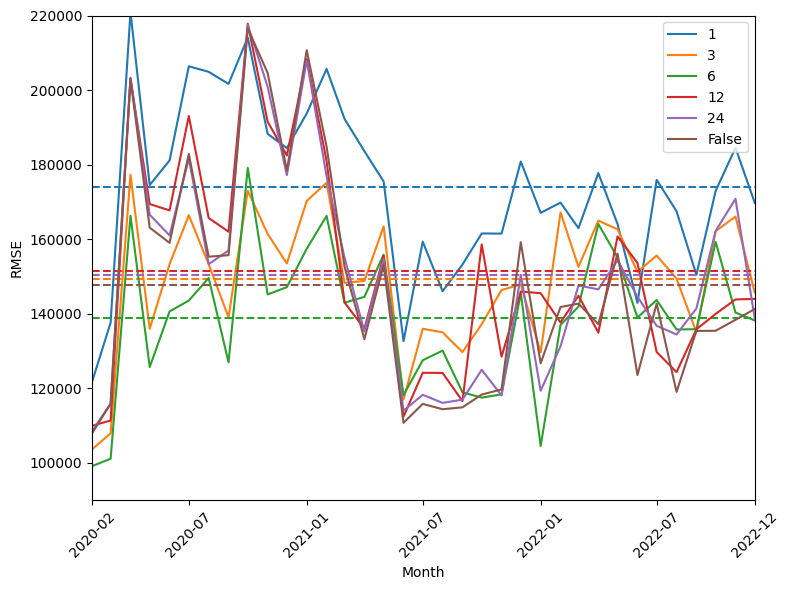

The dashed lines correspond to the mean values for each series. The mean values for the models with rolling window size 1, 3, 6, 12, and 24 and the expanding window are, respectively, 173904.75, 149191.22, 138908.62, 151507.69, 150259.45, and 147708.97.


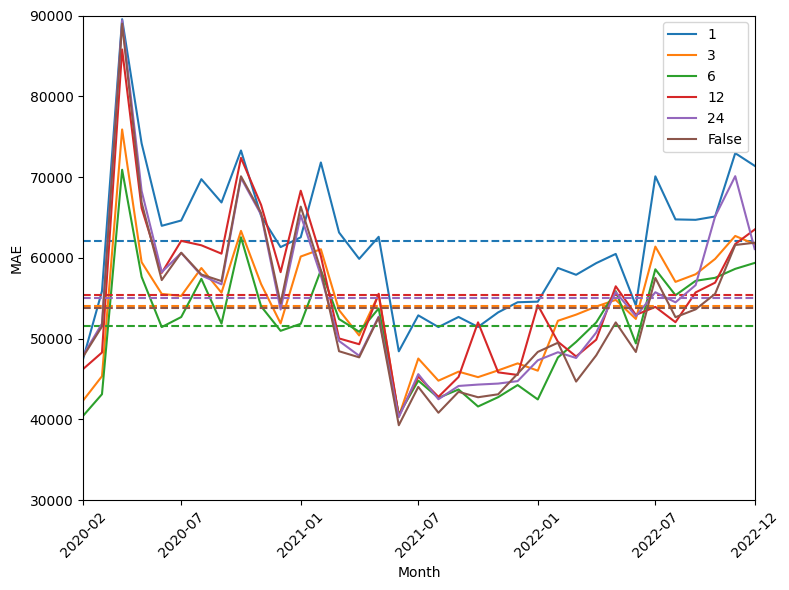

The dashed lines correspond to the mean values for each series. The mean values for the models with rolling window size 1, 3, 6, 12, and 24 and the expanding window are, respectively, 62018.05, 54014.45, 51543.04, 55453.06, 54986.02, and 53828.64.


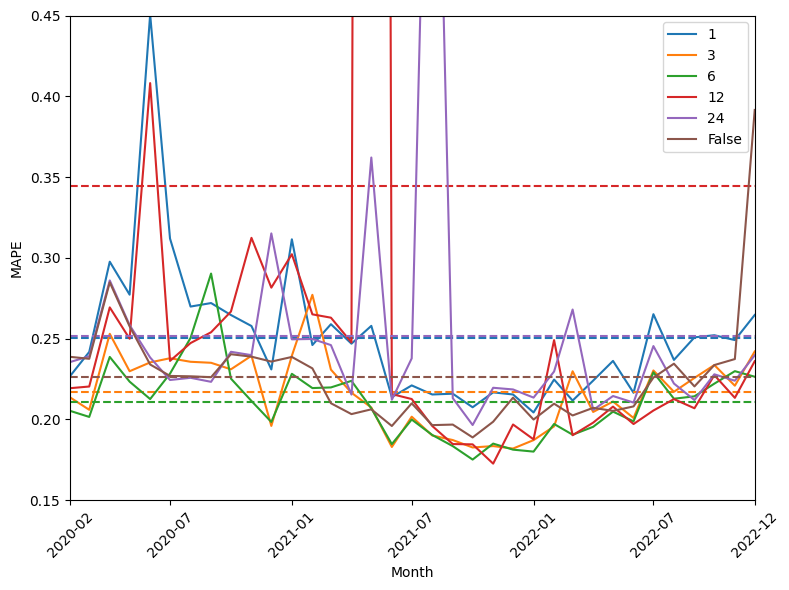

The dashed lines correspond to the mean values for each series. The mean values for the models with rolling window size 1, 3, 6, 12, and 24 and the expanding window are, respectively, 0.25, 0.22, 0.21, 0.34, 0.25, and 0.23.


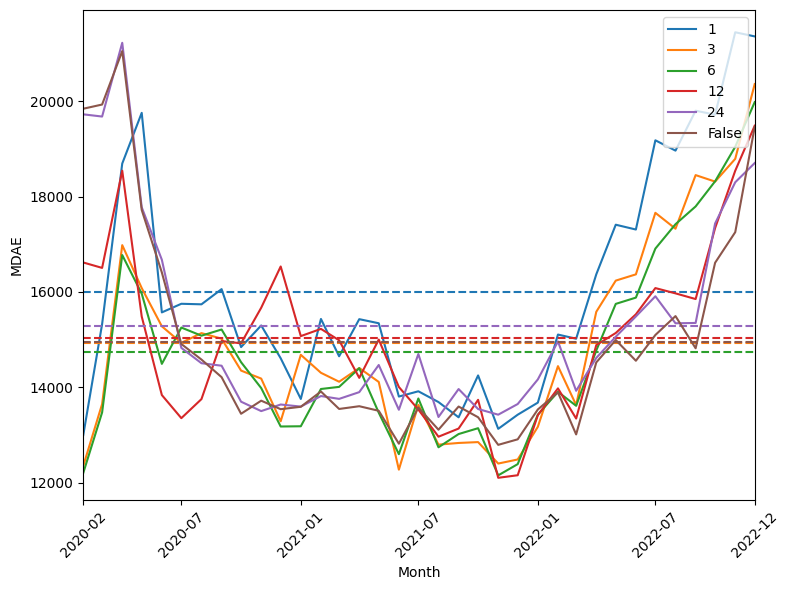

The dashed lines correspond to the mean values for each series. The mean values for the models with rolling window size 1, 3, 6, 12, and 24 and the expanding window are, respectively, 16005.37, 14927.50, 14736.39, 15024.38, 15276.22, and 14940.70.


In [8]:
# Plots: experiment 3 (tuning in 2018), plot results for different window sizes

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

path_ = r'G:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage'
w_sizes = [1, 3, 6, 12, 24, False]
error_metrics = ['rmse', 'mae', 'mape', 'mdae']

for em in error_metrics:

    # Initialize an empty dictionary to store the data frames with the results
    results_dfs = {}

    for ws in w_sizes:

        # Read df
        res_df = pd.read_csv(path_ + f'\exp3{ws}_notuning.csv', index_col=0)

        # Rename columns
        res_df = res_df.rename(columns={col: f'{col}_exp3{ws}' for col in res_df.columns if col != 'month'})

        # Save into data frame
        results_dfs[f'res_{ws}'] = res_df
        del res_df

    # Merge data frames together
    results = results_dfs['res_1']
    for ws in w_sizes[1:]:

        results = results.merge(results_dfs[f'res_{ws}'], how='left', on=['month'])

    results['month'] = pd.to_datetime(results['month'])
    results = results[results['month'] >= pd.Timestamp('2020-02-01')]
    # print(results.head())

    # Make plot
    plt.figure(figsize=(8, 6))
    ax = plt.gca()

    for ws in w_sizes:
        color = next(ax._get_lines.prop_cycler)['color']
        plt.plot(results['month'], results[str(em)+'_exp3'+str(ws)], label=ws, color=color)
        mean_val = results[str(em) + '_exp3' + str(ws)].mean()
        plt.axhline(y = results[str(em)+'_exp3'+str(ws)].mean(), linestyle = '--', label='', color=color)

    if em=="rmse":
        ax.set_ylim([90000, 220000])
    if em=="mae":
        ax.set_ylim([30000, 90000])
    if em=="mape":
        ax.set_ylim([0.15, 0.45])

    plt.xlabel('Month')
    plt.ylabel(em.upper())

    tick_dates = pd.date_range(start='2020-07-01', end=results['month'].max(), freq='6MS')
    tick_dates = pd.to_datetime([results['month'].min()]).append(tick_dates).append(pd.to_datetime([results['month'].max()]))
    ax.set_xticks(tick_dates)
    ax.set_xlim(results['month'].min(), results['month'].max())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    plt.xticks(rotation=45)
    plt.legend(loc="upper right")

    plt.tight_layout()

    # Save plot
    if True:
        path_p = os.path.join(PATH_DATA_OUT, 'Plots', 'EstimationResults', 'TrainingStage', 
                             'Experiment_3', f'{em}_1.png')
        plt.savefig(path_p, dpi=300)  # Save as PNG with high resolution


    plt.show()

    # Create latex code with note
    mean_values = [results[str(em)+'_exp3'+str(ws)].mean() for ws in w_sizes]
    note_template = (
        "The dashed lines correspond to the mean values for each series. "
        "The mean values for the models with rolling window size 1, 3, 6, 12, and 24 and the expanding window are, "
        "respectively, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, and {:.2f}."
    )
    note_latex = note_template.format(*mean_values)
#     note_latex = r"""
# \begin{adjustwidth}{-0.4cm}{-0.4cm}
#     \begin{tablenotes}[flushleft]
#         \item\textbf{Notes:} """ + note_latex + r"""
#     \end{tablenotes}
# \end{adjustwidth}
# """
    # Print in console
    print(note_latex)
    # Save to txt
    path__ = os.path.join(PATH_DATA_OUT, 'Plots', 'EstimationResults', 'TrainingStage', 'Experiment_3', 'Notes', f'note_{em}_1.txt')
    text_file = open(path__, "w")
    text_file.write(note_latex)
    text_file.close()

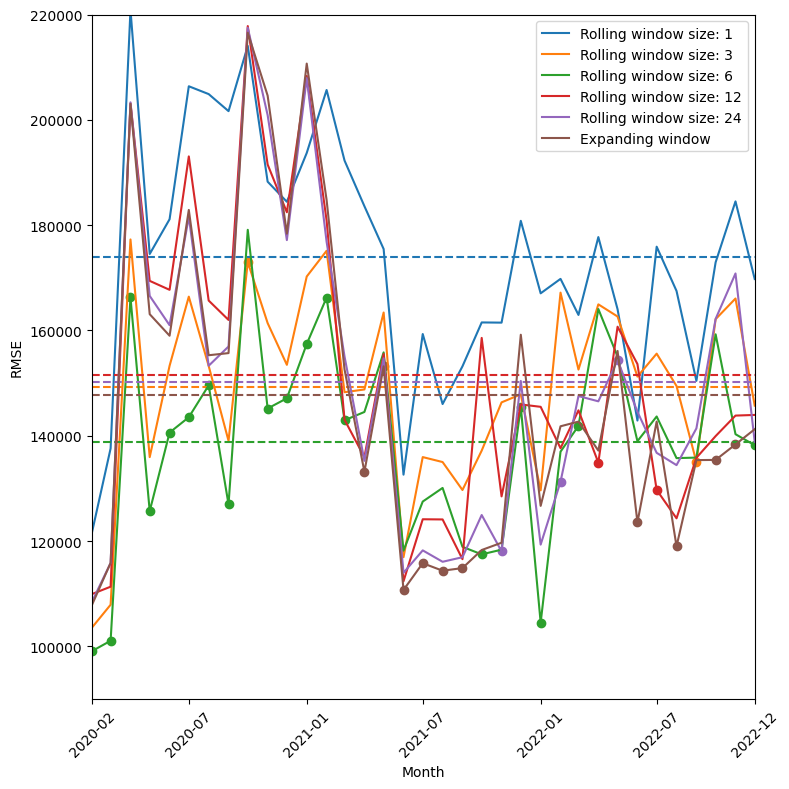

The dashed lines correspond to the mean values for each series. The mean values for the models with rolling window size 1, 3, 6, 12, and 24 and the expanding window are, respectively, 173,905, 149,191, 138,909, 151,508, 150,259, and 147,709.The dots represent the lowest value of the error metric for all models in each month and the colour corresponds to the model that produced that value.


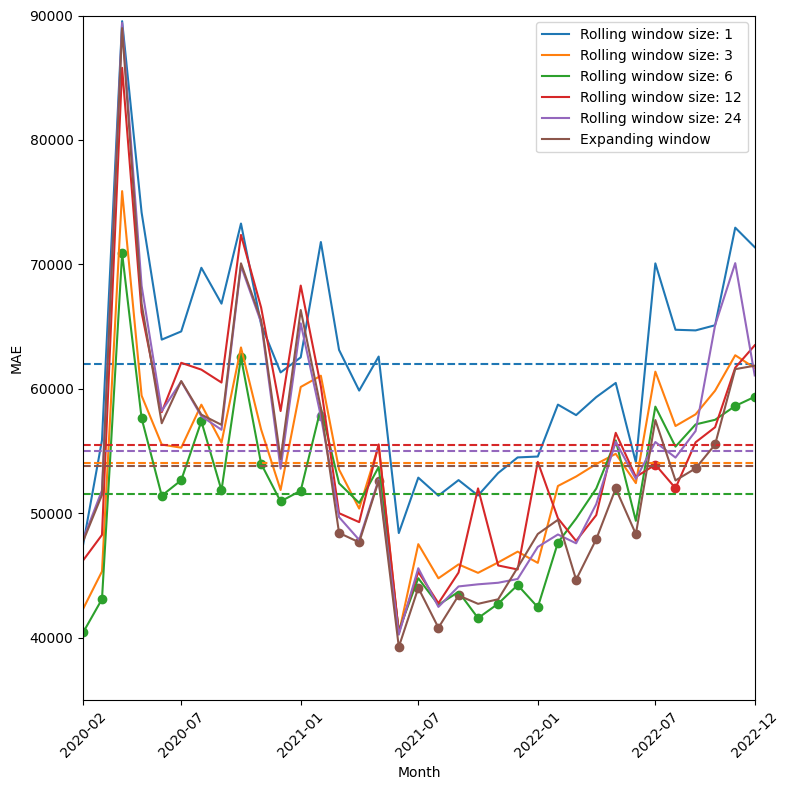

The dashed lines correspond to the mean values for each series. The mean values for the models with rolling window size 1, 3, 6, 12, and 24 and the expanding window are, respectively, 62,018, 54,014, 51,543, 55,453, 54,986, and 53,829.The dots represent the lowest value of the error metric for all models in each month and the colour corresponds to the model that produced that value.


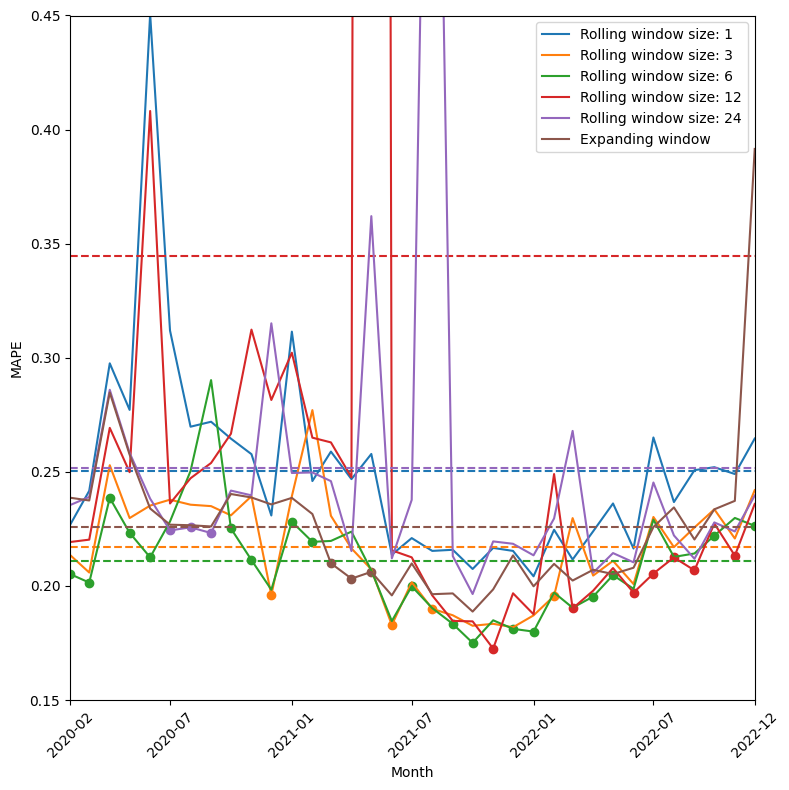

The dashed lines correspond to the mean values for each series. The mean values for the models with rolling window size 1, 3, 6, 12, and 24 and the expanding window are, respectively, 0, 0, 0, 0, 0, and 0.The dots represent the lowest value of the error metric for all models in each month and the colour corresponds to the model that produced that value.


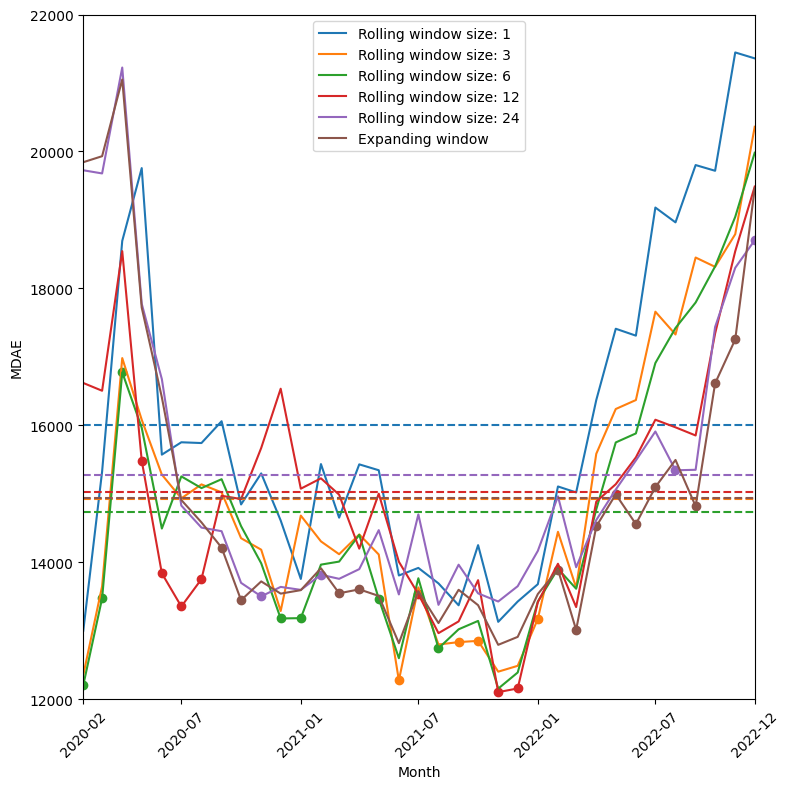

The dashed lines correspond to the mean values for each series. The mean values for the models with rolling window size 1, 3, 6, 12, and 24 and the expanding window are, respectively, 16,005, 14,928, 14,736, 15,024, 15,276, and 14,941.The dots represent the lowest value of the error metric for all models in each month and the colour corresponds to the model that produced that value.


In [2]:
# Plots: experiment 3 (tuning in 2018), plot results for different window sizes (add colored points)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

path_ = r'G:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage'
w_sizes = [1, 3, 6, 12, 24, False]
error_metrics = ['rmse', 'mae', 'mape', 'mdae']

for em in error_metrics:

    # Initialize an empty dictionary to store the data frames with the results
    results_dfs = {}

    for ws in w_sizes:

        # Read df
        res_df = pd.read_csv(path_ + f'\exp3{ws}_notuning.csv', index_col=0)

        # Rename columns
        res_df = res_df.rename(columns={col: f'{col}_exp3{ws}' for col in res_df.columns if col != 'month'})

        # Save into data frame
        results_dfs[f'res_{ws}'] = res_df
        del res_df

    # Merge data frames together
    results = results_dfs['res_1']
    for ws in w_sizes[1:]:

        results = results.merge(results_dfs[f'res_{ws}'], how='left', on=['month'])

    results['month'] = pd.to_datetime(results['month'])
    results = results[results['month'] >= pd.Timestamp('2020-02-01')]

    # print(results.head())

    # Make plot
    plt.figure(figsize=(8, 8))
    ax = plt.gca()

    # Track colors for each line to match points later
    line_colors = {}

    # Plot lines
    for ws in w_sizes:
        color = next(ax._get_lines.prop_cycler)['color']
        line_colors[ws] = color
        # Replace 'False' in the label with 'Expanding window'
        if ws==False:
            label_text = str(ws).replace(str(ws), 'Expanding window')
        else:
            label_text = str(ws).replace(str(ws), f'Rolling window size: {ws}')
        
        plt.plot(results['month'], results[str(em)+'_exp3'+str(ws)], label=label_text, color=color)
        plt.axhline(y = results[str(em)+'_exp3'+str(ws)].mean(), linestyle = '--', label='', color=color)

    # Plot minimum value points
    for date in results['month']:
        # Find the window size with the minimum value for this month
        min_ws = min(w_sizes, key=lambda ws: results.loc[results['month'] == date, str(em) + '_exp3' + str(ws)].item())
        min_val = results.loc[results['month'] == date, str(em) + '_exp3' + str(min_ws)].item()

        # Plot the point
        plt.scatter(date, min_val, color=line_colors[min_ws])

    if em=="rmse":
        ax.set_ylim([90000, 220000])
        plt.legend(loc="upper right")
    if em=="mae":
        ax.set_ylim([35000, 90000])
        plt.legend(loc="upper right")
    if em=="mape":
        ax.set_ylim([0.15, 0.45])
        plt.legend(loc="upper right")
    if em=="mdae":
        ax.set_ylim([12000, 22000])
        plt.legend(loc="upper center")

    plt.xlabel('Month')
    plt.ylabel(em.upper())

    tick_dates = pd.date_range(start='2020-07-01', end=results['month'].max(), freq='6MS')
    tick_dates = pd.to_datetime([results['month'].min()]).append(tick_dates).append(pd.to_datetime([results['month'].max()]))
    ax.set_xticks(tick_dates)
    ax.set_xlim(results['month'].min(), results['month'].max())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    plt.xticks(rotation=45)

    plt.tight_layout()
    

    # Save plot
    if True:
        path_p = os.path.join(PATH_DATA_OUT, 'Plots', 'EstimationResults', 'TrainingStage', 
                             'Experiment_3', f'{em}_2.png')
        plt.savefig(path_p, dpi=300)  # Save as PNG with high resolution


    plt.show()

    # Create latex code with note
    mean_values = [results[str(em)+'_exp3'+str(ws)].mean() for ws in w_sizes]
    note_template = (
        "The dashed lines correspond to the mean values for each series. "
        "The mean values for the models with rolling window size 1, 3, 6, 12, and 24 and the expanding window are, "
        "respectively, {:,.0f}, {:,.0f}, {:,.0f}, {:,.0f}, {:,.0f}, and {:,.0f}."
        "The dots represent the lowest value of the error metric for all models in each month and the colour corresponds to the model that produced that value."
    )
    note_latex = note_template.format(*mean_values)
    # Print in console
    print(note_latex)
    # Save to txt
    path__ = os.path.join(PATH_DATA_OUT, 'Plots', 'EstimationResults', 'TrainingStage', 'Experiment_3', 'Notes', f'note_{em}_1.txt')
    text_file = open(path__, "w")
    text_file.write(note_latex)
    text_file.close()

In [169]:
# Table: amout of periods of best overall performance for each model

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

path_ = r'G:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage'
w_sizes = [1, 3, 6, 12, 24, False]
# error_metrics = ['rmse', 'mae', 'mape', 'mdae']
error_metrics = ['rmse', 'mae']

# Initialize an empty dictionary to store the number of times each model was the best
min_counts = {}

for em in error_metrics:

    # Create an empty data frame for the error metric and place it into min_counts
    min_counts[em] = pd.DataFrame(index=[em + '_exp3' + str(ws) for ws in w_sizes])

    # Initialize an empty dictionary to store the data frames with the results
    results_dfs = {}

    for ws in w_sizes:

        # Read df
        res_df = pd.read_csv(path_ + f'\exp3{ws}_notuning.csv', index_col=0)

        # Rename columns
        res_df = res_df.rename(columns={col: f'{col}_exp3{ws}' for col in res_df.columns if col != 'month'})

        # Save into data frame
        results_dfs[f'res_{ws}'] = res_df
        del res_df

    # Merge data frames together
    results = results_dfs['res_1']
    for ws in w_sizes[1:]:

        results = results.merge(results_dfs[f'res_{ws}'], how='left', on=['month'])

    results['month'] = pd.to_datetime(results['month'])
    results = results[results['month'] >= pd.Timestamp('2020-02-01')]

# print(results.head())


    # Calculate the number of times each model was best with and without counting the expanding window
    
    # Including the expanding window
    columns_to_compare = [col for col in results.columns if col.startswith(em)]

    for i in range(0,2):

        col_name = 'with_ew'

        if i>0:
            columns_to_compare.remove(f'{em}_exp3False')
            col_name = "without_ew"

        min_columns = results[columns_to_compare].idxmin(axis=1)
        min_count = min_columns.value_counts().to_frame()
        
        min_count.rename(columns={ min_count.columns[0]: em+'_'+col_name}, inplace = True)

        min_counts[em] = pd.merge(min_counts[em], min_count, left_index=True, right_index=True, how='left').fillna(0).astype(int)
        # print(min_counts[em])

    # Clean index
    min_counts[em].index = min_counts[em].index.str.replace(f'{em}_exp3', '')
    min_counts[em].index = min_counts[em].index.str.replace('False', 'Expanding')

# Create final table
final_table = pd.DataFrame(index=[str(ws) for ws in w_sizes])
final_table.index = final_table.index.str.replace('False', 'Expanding')
for col_name in ['with_ew', 'without_ew']:
    for em in error_metrics:
        final_table = pd.merge(final_table, min_counts[em][ em+'_'+col_name], left_index=True, right_index=True, how='left')

# Put - in correspoding cells
cols_to_replace = [col for col in final_table.columns if col.endswith('without_ew')]
final_table.loc['Expanding', cols_to_replace] = '-'

# Index as first column
final_table.insert(0, column='Window', value=final_table.index)
# final_table['Window'] = final_table.index

print(final_table)

# To LaTeX
ltx = final_table.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:,.0f}".format)

path_ = os.path.join(PATH_DATA_OUT, 'Tables', 'LaTeX', 'count_best_models_by_month.txt')
text_file = open(path_, "w")

text_file.write(ltx)
text_file.close()

print(ltx)



              Window  rmse_with_ew  mae_with_ew rmse_without_ew mae_without_ew
1                  1             0            0               0              0
3                  3             2            0               2              1
6                  6            18           19              20             22
12                12             2            2               6              5
24                24             3            1               7              7
Expanding  Expanding            10           13               -              -
\begin{tabular}{lrrll}
\toprule
   Window &  rmse\_with\_ew &  mae\_with\_ew & rmse\_without\_ew & mae\_without\_ew \\
\midrule
        1 &             0 &            0 &               0 &              0 \\
        3 &             2 &            0 &               2 &              1 \\
        6 &            18 &           19 &              20 &             22 \\
       12 &             2 &            2 &               6 &              5 \\
   

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9448\1339555954.py:90: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  ltx = final_table.to_latex(index=False,


        month  loop_duration_seconds_exp31     rmse_exp31     mae_exp31  mape_exp31    mdae_exp31  loop_duration_seconds_exp33     rmse_exp33     mae_exp33  mape_exp33    mdae_exp33  loop_duration_seconds_exp36     rmse_exp36     mae_exp36  mape_exp36    mdae_exp36  loop_duration_seconds_exp312    rmse_exp312    mae_exp312  mape_exp312   mdae_exp312  loop_duration_seconds_exp324    rmse_exp324    mae_exp324  mape_exp324   mdae_exp324  loop_duration_seconds_exp3False  rmse_exp3False  mae_exp3False  mape_exp3False  mdae_exp3False  rmse_exp3Ideal
25 2020-02-01                     0.612684  121693.044479  47498.208265    0.226740  12998.566395                     1.284488  103589.450682  42331.940924    0.213590  12351.933781                     2.368347   99111.720299  40437.390045    0.205241  12203.905295                      4.023363  109946.658570  46228.062553     0.219263  16617.335324                      6.966488  108491.365726  47923.293755     0.235443  19724.605656             

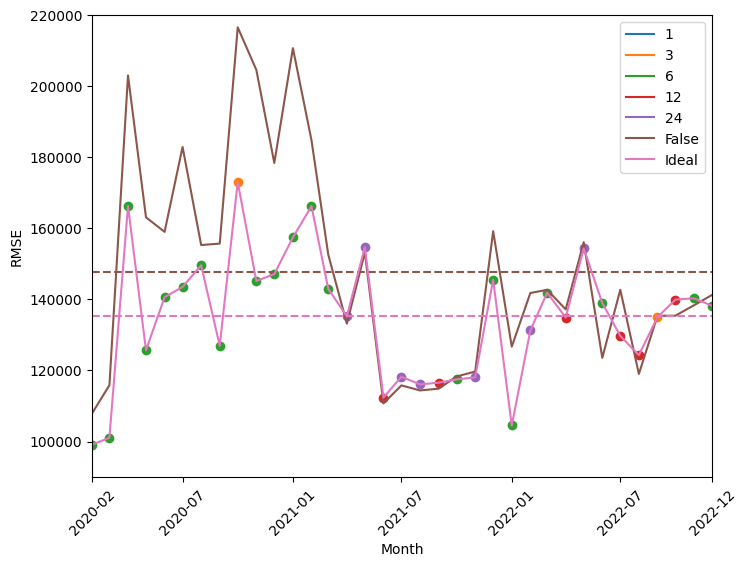

        month  loop_duration_seconds_exp31     rmse_exp31     mae_exp31  mape_exp31    mdae_exp31  loop_duration_seconds_exp33     rmse_exp33     mae_exp33  mape_exp33    mdae_exp33  loop_duration_seconds_exp36     rmse_exp36     mae_exp36  mape_exp36    mdae_exp36  loop_duration_seconds_exp312    rmse_exp312    mae_exp312  mape_exp312   mdae_exp312  loop_duration_seconds_exp324    rmse_exp324    mae_exp324  mape_exp324   mdae_exp324  loop_duration_seconds_exp3False  rmse_exp3False  mae_exp3False  mape_exp3False  mdae_exp3False  mae_exp3Ideal
25 2020-02-01                     0.612684  121693.044479  47498.208265    0.226740  12998.566395                     1.284488  103589.450682  42331.940924    0.213590  12351.933781                     2.368347   99111.720299  40437.390045    0.205241  12203.905295                      4.023363  109946.658570  46228.062553     0.219263  16617.335324                      6.966488  108491.365726  47923.293755     0.235443  19724.605656              

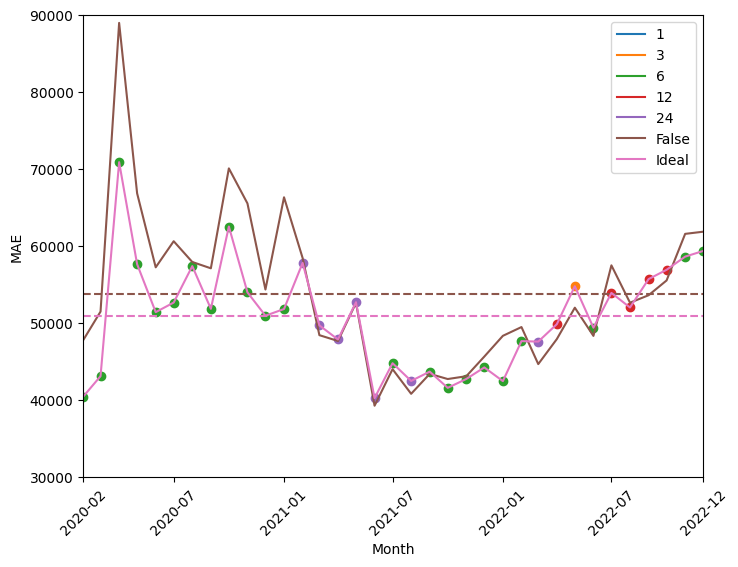

        month  loop_duration_seconds_exp31     rmse_exp31     mae_exp31  mape_exp31    mdae_exp31  loop_duration_seconds_exp33     rmse_exp33     mae_exp33  mape_exp33    mdae_exp33  loop_duration_seconds_exp36     rmse_exp36     mae_exp36  mape_exp36    mdae_exp36  loop_duration_seconds_exp312    rmse_exp312    mae_exp312  mape_exp312   mdae_exp312  loop_duration_seconds_exp324    rmse_exp324    mae_exp324  mape_exp324   mdae_exp324  loop_duration_seconds_exp3False  rmse_exp3False  mae_exp3False  mape_exp3False  mdae_exp3False  mape_exp3Ideal
25 2020-02-01                     0.612684  121693.044479  47498.208265    0.226740  12998.566395                     1.284488  103589.450682  42331.940924    0.213590  12351.933781                     2.368347   99111.720299  40437.390045    0.205241  12203.905295                      4.023363  109946.658570  46228.062553     0.219263  16617.335324                      6.966488  108491.365726  47923.293755     0.235443  19724.605656             

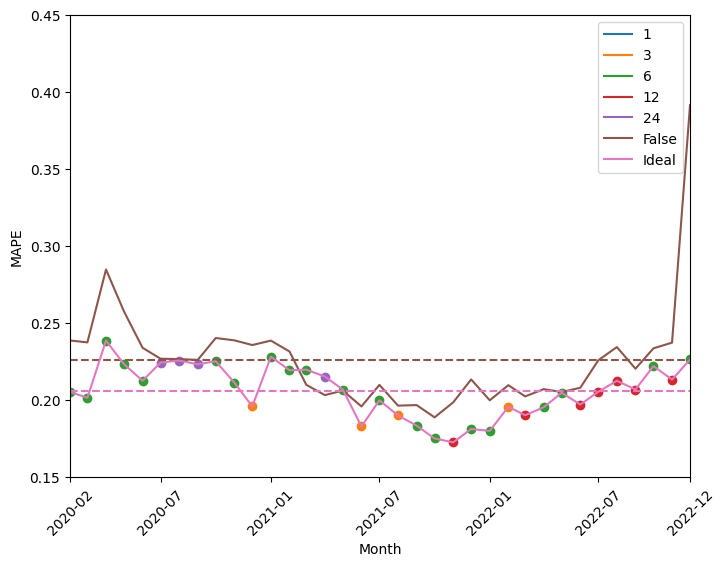

        month  loop_duration_seconds_exp31     rmse_exp31     mae_exp31  mape_exp31    mdae_exp31  loop_duration_seconds_exp33     rmse_exp33     mae_exp33  mape_exp33    mdae_exp33  loop_duration_seconds_exp36     rmse_exp36     mae_exp36  mape_exp36    mdae_exp36  loop_duration_seconds_exp312    rmse_exp312    mae_exp312  mape_exp312   mdae_exp312  loop_duration_seconds_exp324    rmse_exp324    mae_exp324  mape_exp324   mdae_exp324  loop_duration_seconds_exp3False  rmse_exp3False  mae_exp3False  mape_exp3False  mdae_exp3False  mdae_exp3Ideal
25 2020-02-01                     0.612684  121693.044479  47498.208265    0.226740  12998.566395                     1.284488  103589.450682  42331.940924    0.213590  12351.933781                     2.368347   99111.720299  40437.390045    0.205241  12203.905295                      4.023363  109946.658570  46228.062553     0.219263  16617.335324                      6.966488  108491.365726  47923.293755     0.235443  19724.605656             

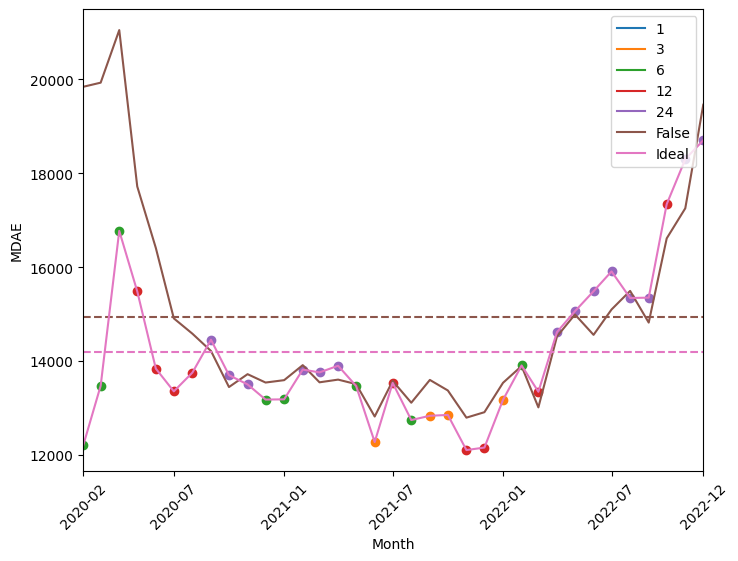

In [195]:
# Plots: experiment 3 (tuning in 2018), plot results for benchmark and model with ideal dynamic window sizes

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

path_ = r'G:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage'
w_sizes = [1, 3, 6, 12, 24, False]
w_sizes_minus_false = [1, 3, 6, 12, 24]
w_sizes_plus_ideal = [1, 3, 6, 12, 24, False, 'Ideal']
w_sizes_correct = [False, 'Ideal']
error_metrics = ['rmse', 'mae', 'mape', 'mdae']

for em in error_metrics:

    # Initialize an empty dictionary to store the data frames with the results
    results_dfs = {}

    for ws in w_sizes:

        # Read df
        res_df = pd.read_csv(path_ + f'\exp3{ws}_notuning.csv', index_col=0)

        # Rename columns
        res_df = res_df.rename(columns={col: f'{col}_exp3{ws}' for col in res_df.columns if col != 'month'})

        # Save into data frame
        results_dfs[f'res_{ws}'] = res_df
        del res_df

    # Merge data frames together
    results = results_dfs['res_1']
    for ws in w_sizes[1:]:

        results = results.merge(results_dfs[f'res_{ws}'], how='left', on=['month'])

    results['month'] = pd.to_datetime(results['month'])
    results = results[results['month'] >= pd.Timestamp('2020-02-01')]
    # results.head()

    # Calculate ideal error series
    cols = [col for col in results.columns if (col.startswith(em)) and not (col.endswith('False'))]
    results[f'{em}_exp3Ideal'] = results[cols].min(axis=1)
    
    # print(results.head())

    # Make plot
    plt.figure(figsize=(8, 6))
    ax = plt.gca()

    # Track colors for each line to match points later
    line_colors = {}

    # Plot lines
    for ws in w_sizes_plus_ideal:
        color = next(ax._get_lines.prop_cycler)['color']
        line_colors[ws] = color

        # Pass some
        if ws not in w_sizes_correct:
            store = results[str(em)+'_exp3'+str(ws)]
            results[str(em)+'_exp3'+str(ws)] = np.nan

        plt.plot(results['month'], results[str(em)+'_exp3'+str(ws)], label=ws, color=color)
        plt.axhline(y = results[str(em)+'_exp3'+str(ws)].mean(), linestyle = '--', label='', color=color)

        if ws not in w_sizes_correct:
            results[str(em)+'_exp3'+str(ws)] = store

    # Plot minimum value points
    for date in results['month']:
        # Find the window size with the minimum value for this month
        min_ws = min(w_sizes_minus_false, key=lambda ws: results.loc[results['month'] == date, str(em) + '_exp3' + str(ws)].item())
        min_val = results.loc[results['month'] == date, str(em) + '_exp3' + str(min_ws)].item()

        # Plot the point
        plt.scatter(date, min_val, color=line_colors[min_ws])

    plt.xlabel('Month')
    plt.ylabel(em.upper())
    
    tick_dates = pd.date_range(start='2020-07-01', end=results['month'].max(), freq='6MS')
    tick_dates = pd.to_datetime([results['month'].min()]).append(tick_dates).append(pd.to_datetime([results['month'].max()]))
    ax.set_xticks(tick_dates)
    ax.set_xlim(results['month'].min(), results['month'].max())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    plt.xticks(rotation=45)
    plt.legend(loc="upper right")

    if em=="rmse":
        ax.set_ylim([90000, 220000])
    if em=="mae":
        ax.set_ylim([30000, 90000])
    if em=="mape":
        ax.set_ylim([0.15, 0.45])

    # Save plot
    if True:
        path_p = os.path.join(PATH_DATA_OUT, 'Plots', 'EstimationResults', 'TrainingStage', 
                             'Experiment_3', f'{em}_3.png')
        plt.savefig(path_p, dpi=300)  # Save as PNG with high resolution


    plt.show()

In [10]:
# Experiment 3 - Cross-validation method

import ensemble_model
import importlib
importlib.reload(ensemble_model)

w_sizes = [24, 12, 6, 3, 1]

result = ensemble_model.run_ensemble(
                        df=df,
                        sample_df=False,

                        DEP_VAR=DEP_VAR, 
                        INDEP_VARS=INDEP_VARS,

                        equal_weights=False,
                        cv_method=True,
                        time_window_sizes=w_sizes,

                        path_to_error_metrics=os.path.join(PATH_DATA_OUT, 'Tables',
                                                    'EstimationResults', 'TrainingStage'),
                        path_to_models=os.path.join(PATH_DATA_OUT, 'Models', 'not_tuned'),
                        experiment_n=3,

                        verbose=3,   
                        )

# Save result as csv
path_ = os.path.join(PATH_DATA_OUT, 'Tables', 'EstimationResults', 'TrainingStage', f'exp3ensemble_cvmethod_notuning.csv')
result.to_csv(path_)

Starting estimation for month: 2020-02 

Model with smallest error in this month: mae3 

Model with smallest error in this month: mape3 

Model with smallest error in this month: mdae3 

Model with smallest error in this month: rmse24 

Starting estimation for month: 2020-03 

Model with smallest error in this month: mae6 

Model with smallest error in this month: mape6 

Model with smallest error in this month: mdae6 

Model with smallest error in this month: rmse6 

Starting estimation for month: 2020-04 

Model with smallest error in this month: mae6 

Model with smallest error in this month: mape6 

Model with smallest error in this month: mdae6 

Model with smallest error in this month: rmse6 

Starting estimation for month: 2020-05 

Model with smallest error in this month: mae6 

Model with smallest error in this month: mape6 

Model with smallest error in this month: mdae6 

Model with smallest error in this month: rmse6 

Starting estimation for month: 2020-06 

Model with sma

In [11]:
# Experiment 3 - Ensemble with equal weights

import ensemble_model
import importlib
importlib.reload(ensemble_model)

w_sizes = [24, 12, 6, 3, 1]

result = ensemble_model.run_ensemble(
                        df=df,
                        sample_df=False,

                        DEP_VAR=DEP_VAR, 
                        INDEP_VARS=INDEP_VARS,

                        equal_weights=True,
                        time_window_sizes=w_sizes,

                        path_to_error_metrics=os.path.join(PATH_DATA_OUT, 'Tables',
                                                    'EstimationResults', 'TrainingStage'),
                        experiment_n=3,
                        path_to_models=os.path.join(PATH_DATA_OUT, 'Models', 'not_tuned'),

                        verbose=3,   
                        )

# Save result as csv
path_ = os.path.join(PATH_DATA_OUT, 'Tables', 'EstimationResults', 'TrainingStage', f'exp3ensemble_equalw_notuning.csv')
result.to_csv(path_)

Starting estimation for month: 2020-01 

Starting estimation for month: 2020-02 

Starting estimation for month: 2020-03 

Starting estimation for month: 2020-04 

Starting estimation for month: 2020-05 

Starting estimation for month: 2020-06 

Starting estimation for month: 2020-07 

Starting estimation for month: 2020-08 

Starting estimation for month: 2020-09 

Starting estimation for month: 2020-10 

Starting estimation for month: 2020-11 

Starting estimation for month: 2020-12 

Starting estimation for month: 2021-01 

Starting estimation for month: 2021-02 

Starting estimation for month: 2021-03 

Starting estimation for month: 2021-04 

Starting estimation for month: 2021-05 

Starting estimation for month: 2021-06 

Starting estimation for month: 2021-07 

Starting estimation for month: 2021-08 

Starting estimation for month: 2021-09 

Starting estimation for month: 2021-10 

Starting estimation for month: 2021-11 

Starting estimation for month: 2021-12 

Starting estimat

In [12]:
# Experiment 3 - Ensemble with weights according to performance in previous month

import ensemble_model
import importlib
importlib.reload(ensemble_model)

w_sizes = [24, 12, 6, 3, 1]

result = ensemble_model.run_ensemble(
                        df=df,
                        sample_df=False,

                        DEP_VAR=DEP_VAR, 
                        INDEP_VARS=INDEP_VARS,

                        equal_weights=False,
                        cv_method=False,
                        time_window_sizes=w_sizes,

                        path_to_error_metrics=os.path.join(PATH_DATA_OUT, 'Tables',
                                                    'EstimationResults', 'TrainingStage'),
                        path_to_models=os.path.join(PATH_DATA_OUT, 'Models', 'not_tuned'),
                        experiment_n=3,

                        verbose=3,   
                        )

# Save result as csv
path_ = os.path.join(PATH_DATA_OUT, 'Tables', 'EstimationResults', 'TrainingStage', f'exp3ensemble_unequalw_notuning.csv')
result.to_csv(path_)

Starting estimation for month: 2020-02 

Starting estimation for month: 2020-03 

Starting estimation for month: 2020-04 

Starting estimation for month: 2020-05 

Starting estimation for month: 2020-06 

Starting estimation for month: 2020-07 

Starting estimation for month: 2020-08 

Starting estimation for month: 2020-09 

Starting estimation for month: 2020-10 

Starting estimation for month: 2020-11 

Starting estimation for month: 2020-12 

Starting estimation for month: 2021-01 

Starting estimation for month: 2021-02 

Starting estimation for month: 2021-03 

Starting estimation for month: 2021-04 

Starting estimation for month: 2021-05 

Starting estimation for month: 2021-06 

Starting estimation for month: 2021-07 

Starting estimation for month: 2021-08 

Starting estimation for month: 2021-09 

Starting estimation for month: 2021-10 

Starting estimation for month: 2021-11 

Starting estimation for month: 2021-12 

Starting estimation for month: 2022-01 

Starting estimat

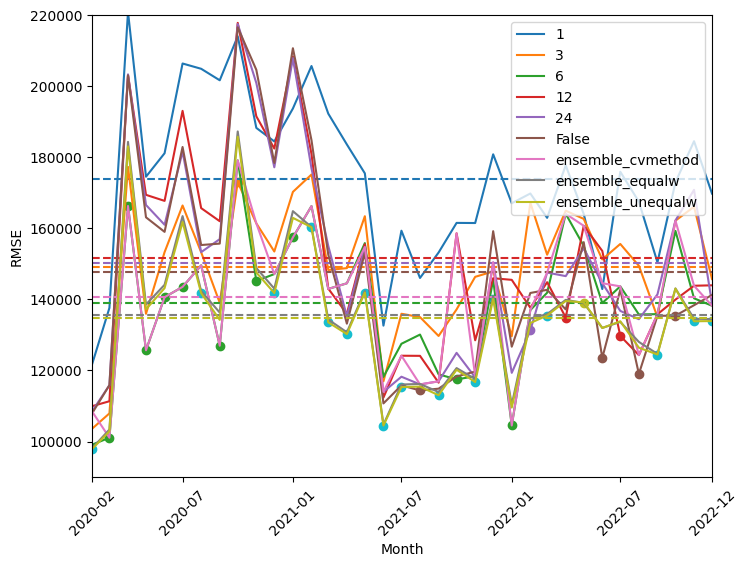

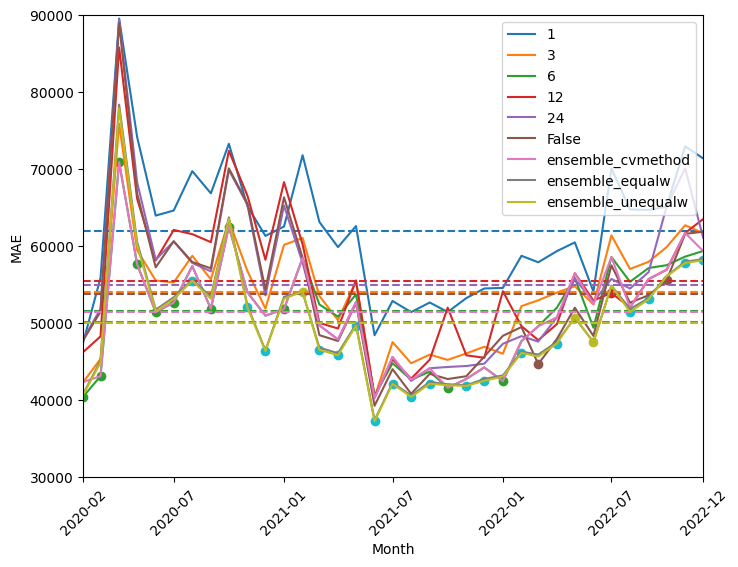

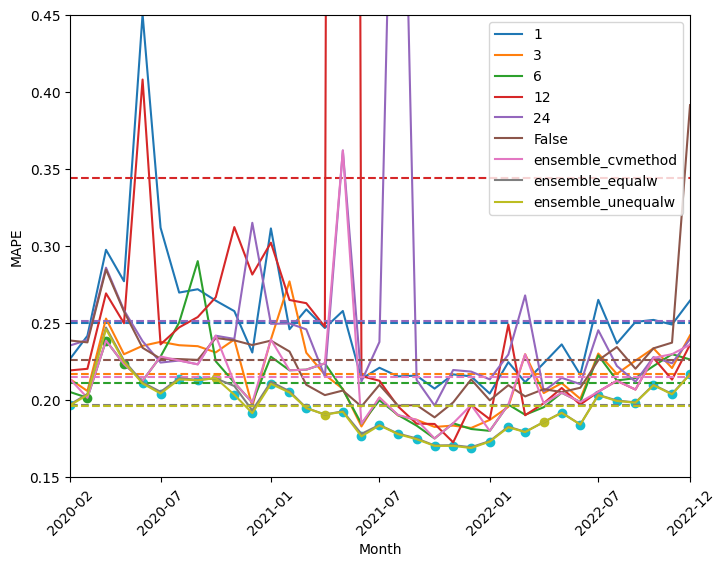

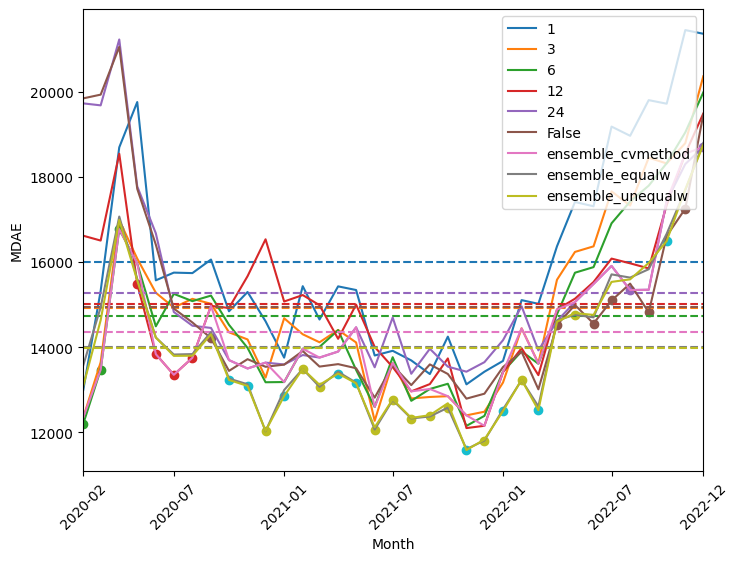

In [214]:
# Plots: experiment 3 (tuning in 2018), plot results for different window sizes + 2 ensembles

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

path_ = r'G:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage'
w_sizes = [1, 3, 6, 12, 24, False, 'ensemble_cvmethod', 'ensemble_equalw', 'ensemble_unequalw']
error_metrics = ['rmse', 'mae', 'mape', 'mdae']

for em in error_metrics:

    # Initialize an empty dictionary to store the data frames with the results
    results_dfs = {}

    for ws in w_sizes:

        # Read df
        res_df = pd.read_csv(path_ + f'\exp3{ws}_notuning.csv', index_col=0)

        # Rename columns
        res_df = res_df.rename(columns={col: f'{col}_exp3{ws}' for col in res_df.columns if col != 'month'})

        # Save into data frame
        results_dfs[f'res_{ws}'] = res_df
        del res_df

    # Merge data frames together
    results = results_dfs['res_1']
    for ws in w_sizes[1:]:

        results = results.merge(results_dfs[f'res_{ws}'], how='left', on=['month'])

    results['month'] = pd.to_datetime(results['month'])
    results = results[results['month'] >= pd.Timestamp('2020-02-01')]
    results.head()

    # Make plot
    plt.figure(figsize=(8, 6))
    ax = plt.gca()

    for ws in w_sizes:
        color = next(ax._get_lines.prop_cycler)['color']
        plt.plot(results['month'], results[str(em)+'_exp3'+str(ws)], label=ws, color=color)
        plt.axhline(y = results[str(em)+'_exp3'+str(ws)].mean(), linestyle = '--', label='', color=color)

    # Plot minimum value points
    for date in results['month']:
        # Find the window size with the minimum value for this month
        min_ws = min(w_sizes, key=lambda ws: results.loc[results['month'] == date, str(em) + '_exp3' + str(ws)].item())
        min_val = results.loc[results['month'] == date, str(em) + '_exp3' + str(min_ws)].item()

        # Plot the point
        plt.scatter(date, min_val, color=line_colors[min_ws])

    plt.xlabel('Month')
    plt.ylabel(em.upper())

    tick_dates = pd.date_range(start='2020-07-01', end=results['month'].max(), freq='6MS')
    tick_dates = pd.to_datetime([results['month'].min()]).append(tick_dates).append(pd.to_datetime([results['month'].max()]))
    ax.set_xticks(tick_dates)
    ax.set_xlim(results['month'].min(), results['month'].max())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")

    if em=="rmse":
        ax.set_ylim([90000, 220000])
    if em=="mae":
        ax.set_ylim([30000, 90000])
    if em=="mape":
        ax.set_ylim([0.15, 0.45])

    # Save plot
    if True:
        path_p = os.path.join(PATH_DATA_OUT, 'Plots', 'EstimationResults', 'TrainingStage', 
                             'Experiment_3', f'{em}_5.png')
        plt.savefig(path_p, dpi=300)  # Save as PNG with high resolution


    plt.show()

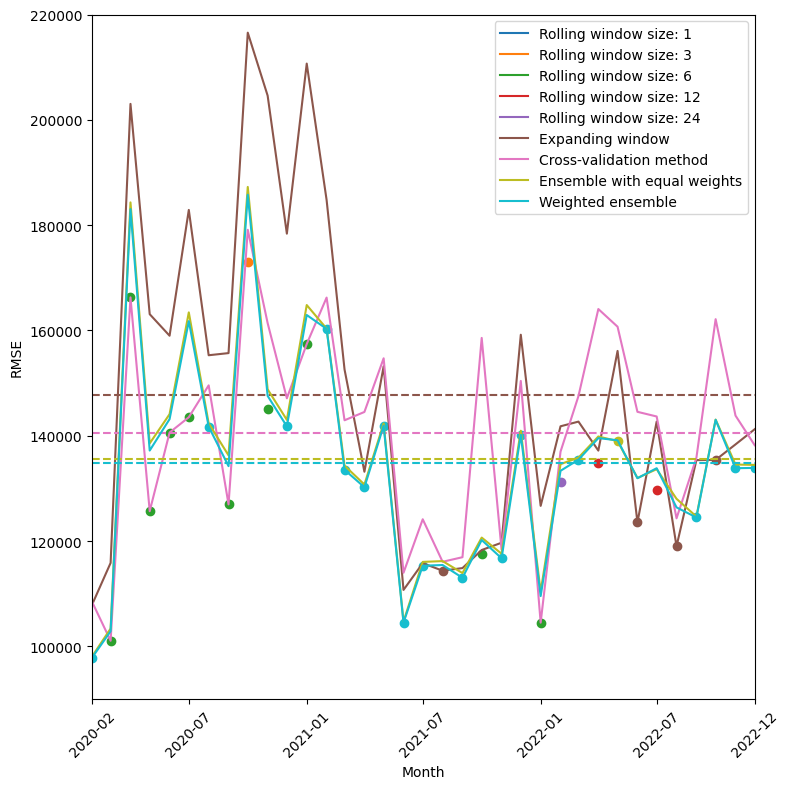

The dashed lines correspond to the mean values for each series. The mean values for the model with an expanding window, the model that uses the cross-validation approach, the ensemble with equal weights, and the weighted ensemble are, respectively, 147,709, 140,587, 135,498, and 134,740. The dots represent the lowest value of the error metric for all models in each month and the colour corresponds to the model that produced that value. The lines for the models with rolling windows were removed for ease of visualization.


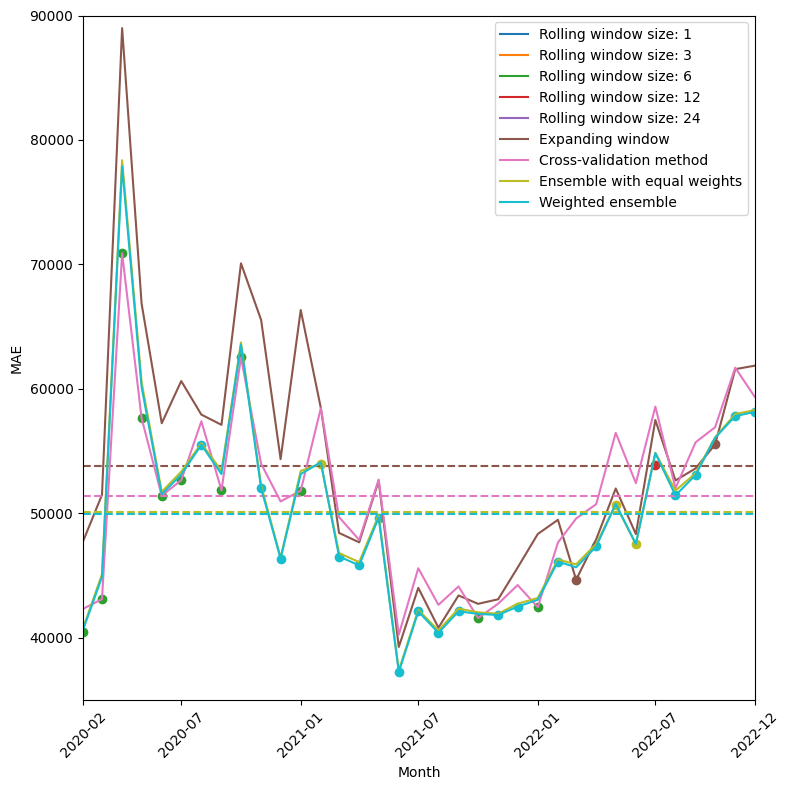

The dashed lines correspond to the mean values for each series. The mean values for the model with an expanding window, the model that uses the cross-validation approach, the ensemble with equal weights, and the weighted ensemble are, respectively, 53,829, 51,435, 50,122, and 49,949. The dots represent the lowest value of the error metric for all models in each month and the colour corresponds to the model that produced that value. The lines for the models with rolling windows were removed for ease of visualization.


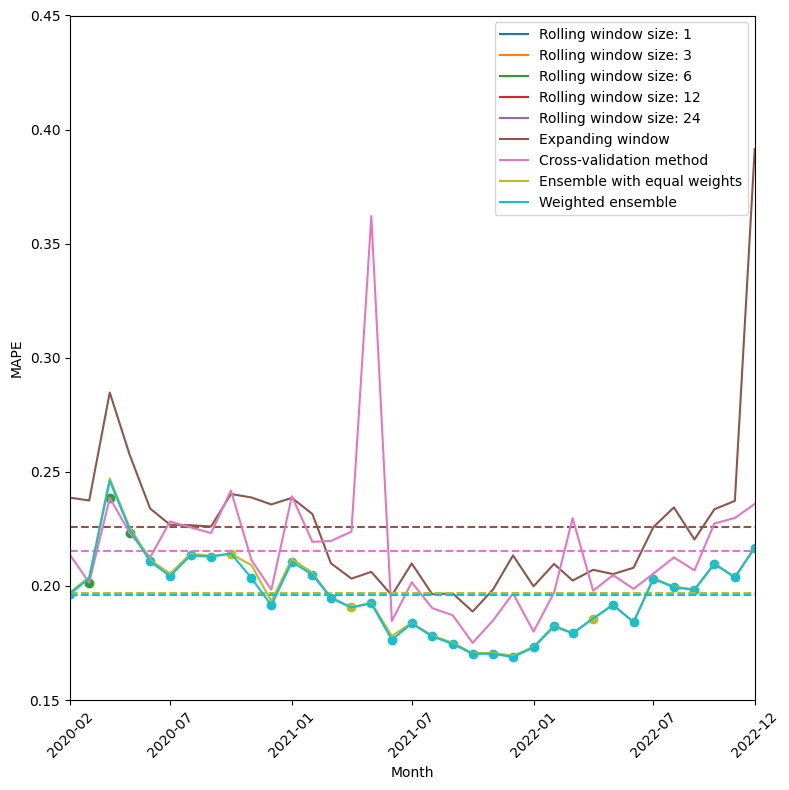

The dashed lines correspond to the mean values for each series. The mean values for the model with an expanding window, the model that uses the cross-validation approach, the ensemble with equal weights, and the weighted ensemble are, respectively, 0, 0, 0, and 0. The dots represent the lowest value of the error metric for all models in each month and the colour corresponds to the model that produced that value. The lines for the models with rolling windows were removed for ease of visualization.


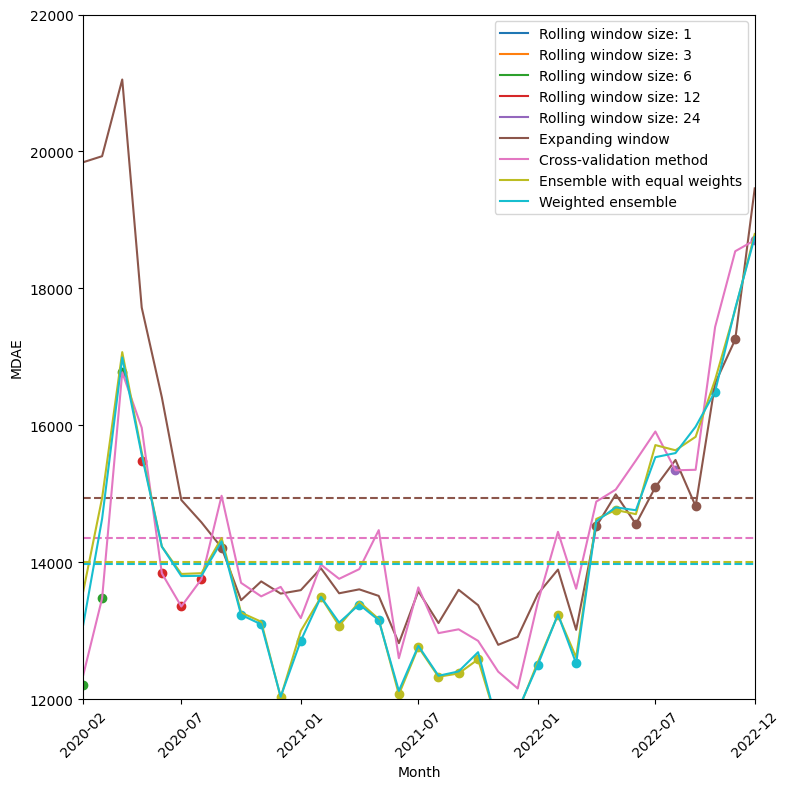

The dashed lines correspond to the mean values for each series. The mean values for the model with an expanding window, the model that uses the cross-validation approach, the ensemble with equal weights, and the weighted ensemble are, respectively, 14,941, 14,354, 14,009, and 13,971. The dots represent the lowest value of the error metric for all models in each month and the colour corresponds to the model that produced that value. The lines for the models with rolling windows were removed for ease of visualization.


In [4]:
# Plots: experiment 3 (tuning in 2018), plot results for benchmark + 2 ensembles

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

path_ = r'G:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage'
w_sizes = [1, 3, 6, 12, 24, False, 'ensemble_cvmethod', 'ensemble_equalw', 'ensemble_unequalw']
w_sizes_correct = [False, 'ensemble_cvmethod', 'ensemble_equalw', 'ensemble_unequalw']
error_metrics = ['rmse', 'mae', 'mape', 'mdae']

for em in error_metrics:

    # Initialize an empty dictionary to store the data frames with the results
    results_dfs = {}

    for ws in w_sizes:

        # Read df
        res_df = pd.read_csv(path_ + f'\exp3{ws}_notuning.csv', index_col=0)

        # Rename columns
        res_df = res_df.rename(columns={col: f'{col}_exp3{ws}' for col in res_df.columns if col != 'month'})

        # Save into data frame
        results_dfs[f'res_{ws}'] = res_df
        del res_df

    # Merge data frames together
    results = results_dfs['res_1']
    for ws in w_sizes[1:]:

        results = results.merge(results_dfs[f'res_{ws}'], how='left', on=[
            'month'])

    results['month'] = pd.to_datetime(results['month'])
    results = results[results['month'] >= pd.Timestamp('2020-02-01')]

    # print(results.head())

    # Make plot
    plt.figure(figsize=(8, 8))
    ax = plt.gca()

    # Track colors for each line to match points later
    line_colors = {}

    for ws in w_sizes:

        # Get color iterator
        color = next(ax._get_lines.prop_cycler)['color']

        # Pass one before the first ensemble because of the "Ideal" model
        if ws == 'ensemble_equalw':
            color = next(ax._get_lines.prop_cycler)['color']

        # Add color to track
        line_colors[ws] = color

         # Replace 'False' in the label with 'Expanding window'
        if ws==False:
            label_text = str(ws).replace(str(ws), 'Expanding window')
        elif ws=='ensemble_cvmethod':
            label_text = str(ws).replace(str(ws), 'Cross-validation method')
        elif ws=='ensemble_equalw':
            label_text = str(ws).replace(str(ws), 'Ensemble with equal weights')
        elif ws=='ensemble_unequalw':
            label_text = str(ws).replace(str(ws), 'Weighted ensemble')
        else:
            label_text = str(ws).replace(str(ws), f'Rolling window size: {ws}')

        # Pass some
        if ws not in w_sizes_correct:
            plt.plot(np.NaN, np.NaN, label=label_text, color=color)
            continue

        # Plot line graphs
        plt.plot(results['month'], results[str(em)+'_exp3'+str(ws)], label=label_text, color=color)
        plt.axhline(y = results[str(em)+'_exp3'+str(ws)].mean(), linestyle = '--', label='', color=color)

    # Plot minimum value points
    for date in results['month']:
        # Find the window size with the minimum value for this month
        min_ws = min(w_sizes, key=lambda ws: results.loc[results['month'] == date, str(em) + '_exp3' + str(ws)].item())
        min_val = results.loc[results['month'] == date, str(em) + '_exp3' + str(min_ws)].item()

        # Plot the point
        plt.scatter(date, min_val, color=line_colors[min_ws])

    if em=="rmse":
        ax.set_ylim([90000, 220000])
        plt.legend(loc="upper right")
    if em=="mae":
        ax.set_ylim([35000, 90000])
        plt.legend(loc="upper right")
    if em=="mape":
        ax.set_ylim([0.15, 0.45])
        plt.legend(loc="upper right")
    if em=="mdae":
        ax.set_ylim([12000, 22000])
        plt.legend(loc="upper center")

    plt.xlabel('Month')
    plt.ylabel(em.upper())

    tick_dates = pd.date_range(start='2020-07-01', end=results['month'].max(), freq='6MS')
    tick_dates = pd.to_datetime([results['month'].min()]).append(tick_dates).append(pd.to_datetime([results['month'].max()]))
    ax.set_xticks(tick_dates)
    ax.set_xlim(results['month'].min(), results['month'].max())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")

    plt.tight_layout()

    # Save plot
    if True:
        path_p = os.path.join(PATH_DATA_OUT, 'Plots', 'EstimationResults', 'TrainingStage', 
                             'Experiment_3', f'{em}_4.png')
        plt.savefig(path_p, dpi=300)  # Save as PNG with high resolution


    plt.show()

    # Create latex code with note
    mean_values = [results[str(em)+'_exp3'+str(ws)].mean() for ws in w_sizes_correct]
    note_template = (
        "The dashed lines correspond to the mean values for each series. "
        "The mean values for the model with an expanding window, the model that uses the cross-validation approach, the ensemble with equal weights, and the weighted ensemble are, "
        "respectively, {:,.0f}, {:,.0f}, {:,.0f}, and {:,.0f}. "
        "The dots represent the lowest value of the error metric for all models in each month and the colour corresponds to the model that produced that value. "
        "The lines for the models with rolling windows were removed for ease of visualization."
    )
    note_latex = note_template.format(*mean_values)
    # Print in console
    print(note_latex)
    # Save to txt
    path__ = os.path.join(PATH_DATA_OUT, 'Plots', 'EstimationResults', 'TrainingStage', 'Experiment_3', 'Notes', f'note_{em}_4.txt')
    text_file = open(path__, "w")
    text_file.write(note_latex)
    text_file.close()

In [193]:
# Table: amout of periods of best overall performance for each model

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

path_ = r'G:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage'
w_sizes = [1, 3, 6, 12, 24, False, 'ensemble_cvmethod', 'ensemble_equalw', 'ensemble_unequalw']
# error_metrics = ['rmse', 'mae', 'mape', 'mdae']
error_metrics = ['rmse', 'mae']

# Initialize an empty dictionary to store the number of times each model was the best
min_counts = {}

for em in error_metrics:

    # Create an empty data frame for the error metric and place it into min_counts
    min_counts[em] = pd.DataFrame(index=[em + '_exp3' + str(ws) for ws in w_sizes])

    # Initialize an empty dictionary to store the data frames with the results
    results_dfs = {}

    for ws in w_sizes:

        # Read df
        res_df = pd.read_csv(path_ + f'\exp3{ws}_notuning.csv', index_col=0)

        # Rename columns
        res_df = res_df.rename(columns={col: f'{col}_exp3{ws}' for col in res_df.columns if col != 'month'})

        # Save into data frame
        results_dfs[f'res_{ws}'] = res_df
        del res_df

    # Merge data frames together
    results = results_dfs['res_1']
    for ws in w_sizes[1:]:

        results = results.merge(results_dfs[f'res_{ws}'], how='left', on=['month'])

    results['month'] = pd.to_datetime(results['month'])
    results = results[results['month'] >= pd.Timestamp('2020-02-01')]

# print(results.head())


    # Calculate the number of times each model was best with and without counting the expanding window
    
    # Including the expanding window
    

    # Different options
    col_names = ['without_ew', 'with_ew', 'with_ew_and_rest']

    for col_name in col_names:

        # Columns
        columns_to_compare = [col for col in results.columns if col.startswith(em)]

        if col_name=='without_ew':
            columns_to_compare.remove(f'{em}_exp3False')
            columns_to_compare.remove(f'{em}_exp3ensemble_cvmethod')
            columns_to_compare.remove(f'{em}_exp3ensemble_equalw')
            columns_to_compare.remove(f'{em}_exp3ensemble_unequalw')

        if col_name=='with_ew':
            columns_to_compare.remove(f'{em}_exp3ensemble_cvmethod')
            columns_to_compare.remove(f'{em}_exp3ensemble_equalw')
            columns_to_compare.remove(f'{em}_exp3ensemble_unequalw')

        min_columns = results[columns_to_compare].idxmin(axis=1)
        min_count = min_columns.value_counts().to_frame()
        
        min_count.rename(columns={ min_count.columns[0]: em+'_'+col_name}, inplace = True)

        min_counts[em] = pd.merge(min_counts[em], min_count, left_index=True, right_index=True, how='left').fillna(0).astype(int)
        # print(min_counts[em])

    # Clean index
    min_counts[em].index = min_counts[em].index.str.replace(f'{em}_exp3', '')
    min_counts[em].index = min_counts[em].index.str.replace('False', 'Expanding')
    min_counts[em].index = min_counts[em].index.str.replace('ensemble_cvmethod', 'Cross-validation')
    min_counts[em].index = min_counts[em].index.str.replace('ensemble_equalw', 'Ensemble with equal weights')
    min_counts[em].index = min_counts[em].index.str.replace('ensemble_unequalw', 'Weighted ensemble')

# Create final table
final_table = pd.DataFrame(index=[str(ws) for ws in w_sizes])
final_table.index = final_table.index.str.replace('False', 'Expanding')
final_table.index = final_table.index.str.replace('ensemble_cvmethod', 'Cross-validation')
final_table.index = final_table.index.str.replace('ensemble_equalw', 'Ensemble with equal weights')
final_table.index = final_table.index.str.replace('ensemble_unequalw', 'Weighted ensemble')

for col_name in col_names:
    for em in error_metrics:
        final_table = pd.merge(final_table, min_counts[em][ em+'_'+col_name], left_index=True, right_index=True, how='left')

# Put - in correspoding cells
cols_to_replace = [col for col in final_table.columns if (col.endswith('without_ew') or col.endswith('with_ew'))]
final_table.loc['Cross-validation', cols_to_replace] = '-'
final_table.loc['Ensemble with equal weights', cols_to_replace] = '-'
final_table.loc['Weighted ensemble', cols_to_replace] = '-'
cols_to_replace = [col for col in final_table.columns if col.endswith('without_ew')]
final_table.loc['Expanding', cols_to_replace] = '-'


# Index as first column
final_table.insert(0, column='Method', value=final_table.index)
# final_table['Window'] = final_table.index

print(final_table)

# To LaTeX
ltx = final_table.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:,.0f}".format)

path_ = os.path.join(PATH_DATA_OUT, 'Tables', 'LaTeX', 'count_best_models_by_month_2.txt')
text_file = open(path_, "w")

text_file.write(ltx)
text_file.close()

print(ltx)

                                                  Window rmse_without_ew mae_without_ew rmse_with_ew mae_with_ew  rmse_with_ew_and_rest  mae_with_ew_and_rest
1                                                      1               0              0            0           0                      0                     0
3                                                      3               2              1            2           0                      1                     0
6                                                      6              20             22           18          19                     10                    11
12                                                    12               6              5            2           2                      2                     1
24                                                    24               7              7            3           1                      1                     0
Expanding                                      Expan

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9448\2425582195.py:113: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  ltx = final_table.to_latex(index=False,


In [3]:
# Define functions for test of difference in performance

import numpy as np
# from statsmodels.stats.stattools import durbin_watson
from scipy.stats import norm, t

def newey_west_se(errors, lag):
    """
    Calculate Newey-West standard errors for a series of forecast errors,
    correcting for autocorrelation and heteroskedasticity.

    The lag parameter specifies how many previous periods (lags) the 
    method should consider when adjusting for autocorrelation.

    """
    n = len(errors)
    cov = np.cov(errors, rowvar=False)
    for l in range(1, lag + 1):
        cov_matrix = np.cov(errors[l:], errors[:-l], rowvar=False)
        cov_lagged = cov_matrix[0, 1]
        weight = (lag - l + 1) / (lag + 1)
        cov += weight * 2 * cov_lagged
    return np.sqrt(cov / n)

def diebold_mariano_test(error1, error2, nw=True):
    """
    Perform the Diebold-Mariano test for equal predictive accuracy.
    H0: the mean of the differences between the error from two models is equal to zero
    """
    # Calculate loss differential
    diff = error1 - error2

    # Calculate DM statistic
    mean_diff = np.mean(diff)
    lag = int(np.ceil(4 * (len(diff) / 100) ** (2 / 9))) # Rule-of-thumb for lag length

    # # Durbin-Watson statistic for testing autocorrelation
    # dw_stat = durbin_watson(diff)


    # If diff is autocorrelated, we calculate its SE with the Newey West method
    if nw:
        se = newey_west_se(diff, lag)
    else:
        se = np.sqrt(np.var(diff))

    # Calculate statistic
    dm_stat = mean_diff / se

    # Calculate p-value
    # p_value = 2 * norm.cdf(-abs(dm_stat))
    p_value = 2*t.cdf(-abs(dm_stat), df = float(len(diff)) - 1)

    return dm_stat, p_value

In [9]:
# Tables: experiment 3 (tuning in 2018), create table of relative performance for different window sizes
import numpy as np
import pandas as pd

path_ = r'G:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage'
w_sizes = [1, 3, 6, 12, 24, 'ensemble_cvmethod', 'ensemble_equalw', 'ensemble_unequalw', False]
# error_metrics = ['rmse', 'mae', 'mape', 'mdae']
error_metrics = ['rmse', 'mae']

results_table=pd.DataFrame(
        {'window_size': w_sizes[:-1]}
        )

for em in error_metrics:

    # Initialize an empty dictionary to store the data frames with the results
    results_dfs = {}

    for ws in w_sizes:

        # Read df
        res_df = pd.read_csv(path_ + f'\exp3{ws}_notuning.csv', index_col=0)

        # Subset it
        res_df['month'] = pd.to_datetime(res_df['month'])
        res_df = res_df[res_df['month'] >= pd.Timestamp('2020-02-01')]

        # Rename columns
        res_df = res_df.rename(columns={col: f'{col}_exp3{ws}' for col in res_df.columns if col != 'month'})

        # Add to general data frame
        results_dfs[f'res_{ws}'] = res_df
        del res_df

    # Merge data frames together
    results = results_dfs['res_1']
    for ws in w_sizes[1:]:
        results = results.merge(results_dfs[f'res_{ws}'], how='left', on=['month'])

    # Convert date variable to datetime
    results['month'] = pd.to_datetime(results['month'])
    # print(results.head())

    # Calculate the sum of the error for all periods, for each model except the one with all the data
    em_cols = [col for col in results if col.startswith(em) and not col.endswith('False')]
    em_sums = round(results[em_cols].sum() / results[em + '_exp3False'].sum(), 3)
    results_table[em] = np.array(em_sums)

    # Calculate significance of the difference
    dm_stats = []
    p_values = []
    for ws in w_sizes[:-1]:
        error1 = np.array(results_dfs[f'res_{ws}'][f'{em}_exp3{ws}'])
        error2 = np.array(results_dfs['res_False'][f'{em}_exp3False'])

        dm_stat, p_value = diebold_mariano_test(error1, error2, nw=True)
        dm_stats.append(round(dm_stat,3))
        p_values.append(round(p_value,3))
    results_table[f'{em}_dm_stat'] = np.array(dm_stats)
    results_table[f'{em}_dm_pval'] = np.array(p_values)
    
# Save table
path_ = os.path.join(PATH_DATA_OUT, 'Tables', 'EstimationResults', 
                     'TrainingStage', 'all_models_performance_relative_to_False.csv')
results_table.to_csv(path_, index = False, float_format='%.3f')
print(results_table)

# Format results table and export as latex
path_ = os.path.join(PATH_DATA_OUT, 'Tables', 'EstimationResults', 
                     'TrainingStage', 'all_models_performance_relative_to_False.csv')
tab = pd.read_csv(path_)

# Function to append asterisks based on p-values
def append_asterisks(value, p_value):
    # Format value to ensure three decimal places
    formatted_value = f"{value:.3f}" if not value.is_integer() else f"{value:.1f}00"

    if p_value < 0.01:
        return f"{formatted_value}***"  # 3 asterisks for p < 1%
    elif p_value < 0.05:
        return f"{formatted_value}**"   # 2 asterisks for p < 5%
    elif p_value < 0.10:
        return f"{formatted_value}*"    # 1 asterisk for p < 10%
    else:
        return formatted_value          # No asterisks for p >= 10%

# Apply the function to each row for the error metric columns
# for col in ['rmse', 'mae', 'mape', 'mdae']:
for col in ['rmse', 'mae']:
    tab[col] = tab.apply(lambda row: append_asterisks(row[col], row[f'{col}_dm_pval']), axis=1)

# Drop columns
tab = tab.drop([x for x in tab if x.endswith('_stat')], axis=1)
tab = tab.drop([x for x in tab if x.endswith('_pval')], axis=1)

# Rename ensemble rows
tab['window_size'][tab['window_size']=='ensemble_cvmethod'] = 'Cross-validation'
tab['window_size'][tab['window_size']=='ensemble_equalw'] = 'Ensemble with equal weights'
tab['window_size'][tab['window_size']=='ensemble_unequalw'] = 'Weighted ensemble'

# Fix columns
tab.columns = [col_name.upper() for col_name in tab.columns.tolist()]
tab = tab.rename(columns={'WINDOW_SIZE': 'Model by Window Size'})


# Now df has the updated error metric columns
print(tab)

# To LaTeX
ltx = tab.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.3f}".format)
path_ = os.path.join(PATH_DATA_OUT, 'Tables', 'LaTeX', 'all_models_performance_relative_to_False.txt')
text_file = open(path_, "w")

text_file.write(ltx)
text_file.close()

print(ltx)



         window_size   rmse  rmse_dm_stat  rmse_dm_pval    mae  mae_dm_stat  mae_dm_pval
0                  1  1.177         7.077         0.000  1.152        8.439        0.000
1                  3  1.010         0.219         0.828  1.003        0.125        0.901
2                  6  0.940        -1.339         0.189  0.958       -1.418        0.165
3                 12  1.026         2.304         0.027  1.030        3.045        0.004
4                 24  1.017         1.209         0.235  1.022        2.070        0.046
5  ensemble_cvmethod  0.952        -1.111         0.274  0.956       -1.532        0.135
6    ensemble_equalw  0.917        -2.819         0.008  0.931       -3.587        0.001
7  ensemble_unequalw  0.912        -2.918         0.006  0.928       -3.710        0.001
          Model by Window Size      RMSE       MAE
0                            1  1.177***  1.152***
1                            3     1.010     1.003
2                            6     0.940     0

C:\Users\Usuario\AppData\Local\Temp\ipykernel_32536\2206460941.py:97: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  tab['window_size'][tab['window_size']=='ensemble_cvmethod'] = 'Cross-validation'
C:\Users\Usuario\AppData\Local\Temp\ipykerne

In [25]:
# Tables: experiment 3 (tuning in 2018), create table of relative performance for different window sizes (now using 6 as benchmark)
import numpy as np
import pandas as pd

path_ = r'G:\My Drive\MasterThesis\Output\Tables\EstimationResults\TrainingStage'
w_sizes = [1, 3, 12, 24, False, 'ensemble_cvmethod', 'ensemble_equalw', 'ensemble_unequalw']
benchmark_ws = 6
# error_metrics = ['rmse', 'mae', 'mape', 'mdae']
error_metrics = ['rmse', 'mae']

results_table=pd.DataFrame(
        {'window_size': w_sizes}
        )

for em in error_metrics:

    # Initialize an empty dictionary to store the data frames with the results
    results_dfs = {}
    
    # w_sizes_and_b = w_sizes.append(benchmark_ws)
    for ws in w_sizes + [benchmark_ws]:

        # Read df
        res_df = pd.read_csv(path_ + f'\exp3{str(ws)}_notuning.csv', index_col=0)

        # Subset it
        res_df['month'] = pd.to_datetime(res_df['month'])
        res_df = res_df[res_df['month'] >= pd.Timestamp('2020-02-01')]

        # Rename columns
        res_df = res_df.rename(columns={col: f'{col}_exp3{ws}' for col in res_df.columns if col != 'month'})

        # Add to general data frame
        results_dfs[f'res_{ws}'] = res_df
        del res_df

    # Merge data frames together
    results = results_dfs[f'res_{benchmark_ws}']
    for ws in w_sizes:
        results = results.merge(results_dfs[f'res_{ws}'], how='left', on=['month'])

    # Convert date variable to datetime
    results['month'] = pd.to_datetime(results['month'])
    # print(results.head())

    # Calculate the sum of the error for all periods, for each model except the one with all the data
    em_cols = [col for col in results if col.startswith(em) and not col.endswith(str(benchmark_ws))]
    em_sums = round(results[em_cols].sum() / results[em + '_exp3' + str(benchmark_ws)].sum(), 3)
    results_table[em] = np.array(em_sums)

    # Calculate significance of the difference
    dm_stats = []
    p_values = []
    for ws in w_sizes:
        error1 = np.array(results_dfs[f'res_{ws}'][f'{em}_exp3{ws}'])
        error2 = np.array(results_dfs[f'res_{benchmark_ws}'][f'{em}_exp3{benchmark_ws}'])

        dm_stat, p_value = diebold_mariano_test(error1, error2, nw=True)
        dm_stats.append(round(dm_stat,3))
        p_values.append(round(p_value,3))
    results_table[f'{em}_dm_stat'] = np.array(dm_stats)
    results_table[f'{em}_dm_pval'] = np.array(p_values)
    
# Save table
path_ = os.path.join(PATH_DATA_OUT, 'Tables', 'EstimationResults', 
                     'TrainingStage', f'all_models_performance_relative_to_{benchmark_ws}.csv')
results_table.to_csv(path_, index = False, float_format='%.3f')
print(results_table)



# Format results table and export as latex

path_ = os.path.join(PATH_DATA_OUT, 'Tables', 'EstimationResults', 
                     'TrainingStage', f'all_models_performance_relative_to_{benchmark_ws}.csv')
tab = pd.read_csv(path_)

# Function to append asterisks based on p-values
def append_asterisks(value, p_value):
    # Format value to ensure three decimal places
    formatted_value = f"{value:.3f}" if not value.is_integer() else f"{value:.1f}00"

    if p_value < 0.01:
        return f"{formatted_value}***"  # 3 asterisks for p < 1%
    elif p_value < 0.05:
        return f"{formatted_value}**"   # 2 asterisks for p < 5%
    elif p_value < 0.10:
        return f"{formatted_value}*"    # 1 asterisk for p < 10%
    else:
        return formatted_value          # No asterisks for p >= 10%

# Apply the function to each row for the error metric columns
# for col in ['rmse', 'mae', 'mape', 'mdae']:
for col in ['rmse', 'mae']:
    tab[col] = tab.apply(lambda row: append_asterisks(row[col], row[f'{col}_dm_pval']), axis=1)

# Drop columns
tab = tab.drop([x for x in tab if x.endswith('_stat')], axis=1)
tab = tab.drop([x for x in tab if x.endswith('_pval')], axis=1)

# Rename ensemble rows
tab['window_size'][tab['window_size']=='ensemble_cvmethod'] = 'Cross-validation'
tab['window_size'][tab['window_size']=='ensemble_equalw'] = 'Ensemble with equal weights'
tab['window_size'][tab['window_size']=='ensemble_unequalw'] = 'Weighted ensemble'

# Fix columns
tab.columns = [col_name.upper() for col_name in tab.columns.tolist()]
tab = tab.rename(columns={'WINDOW_SIZE': 'Model by Window Size'})


# Now df has the updated error metric columns
print(tab)

# To LaTeX
ltx = tab.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.3f}".format)
path_ = os.path.join(PATH_DATA_OUT, 'Tables', 'LaTeX', f'all_models_performance_relative_to_{benchmark_ws}.txt')
text_file = open(path_, "w")

text_file.write(ltx)
text_file.close()

print(ltx)

         window_size   rmse  rmse_dm_stat  rmse_dm_pval    mae  mae_dm_stat  mae_dm_pval
0                  1  1.252         8.032         0.000  1.203       13.630        0.000
1                  3  1.074         7.048         0.000  1.048        9.717        0.000
2                 12  1.091         2.059         0.047  1.076        2.680        0.011
3                 24  1.082         2.027         0.051  1.067        2.477        0.018
4              False  1.063         1.339         0.189  1.044        1.418        0.165
5  ensemble_cvmethod  1.012         1.517         0.138  0.998       -0.558        0.581
6    ensemble_equalw  0.975        -1.179         0.246  0.972       -1.842        0.074
7  ensemble_unequalw  0.970        -1.503         0.142  0.969       -2.114        0.042
          Model by Window Size      RMSE       MAE
0                            1  1.252***  1.203***
1                            3  1.074***  1.048***
2                           12   1.091**   1.0

C:\Users\Usuario\AppData\Local\Temp\ipykernel_32536\2538463134.py:102: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  tab['window_size'][tab['window_size']=='ensemble_cvmethod'] = 'Cross-validation'
C:\Users\Usuario\AppData\Local\Temp\ipykern